<a href="https://colab.research.google.com/github/antonioz2022/Projetos5/blob/main/projetos5_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🗂️ Imports/Upload


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
nome_arquivo = '/content/dataset2.csv'

# Lê o CSV
df = pd.read_csv(nome_arquivo)

/tmp/ipython-input-1436564207.py:4: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nome_arquivo)


#📊 DATASET

In [3]:
df.head()

,sexo,faixa_etaria,renda,mobilidade_reduzida,detalhe_mobilidade,internet_celular,cep_residencia,cidade_residencia,bairro_residencia,logradouro_residencia,...,horario_fim_aula,horario_inicio_aula,origem_ida_aula,outros_aula,freq_aula,transporte_aula,utiliza_app_taxi_aula,utiliza_integracao_aula,terminal_aula,zona_residencia
0,1,5,5,2,0,1,50720595,RECIFE,MADALENA,RUA ARLINDO GOUVEIA,...,0:00:00,0:00:00,0,0,0,0,0,0,0,102
1,2,4,2,2,0,1,51011080,RECIFE,PINA,AVENIDA ENCANTA MOCA,...,0:00:00,0:00:00,0,0,0,0,0,0,0,65
2,2,4,2,2,0,1,53433030,PAULISTA,PAU AMARELO,RUA LUXEMBURGO,...,0:00:00,0:00:00,0,0,0,0,0,0,0,0
3,2,4,2,2,0,1,50050030,RECIFE,BOA VISTA,RUA SETE DE SETEMBRO,...,0:00:00,0:00:00,0,0,0,0,0,0,0,58
4,2,4,3,2,0,1,53419150,PAULISTA,JAGUARANA,RUA CANTOR VANDO,...,0:00:00,0:00:00,0,0,0,0,0,0,0,0


In [4]:
print("Linhas x colunas:", df.shape)
print("\nColunas:")
print(df.columns.tolist())


Linhas x colunas: (58644, 51)

Colunas:
['sexo', 'faixa_etaria', 'renda', 'mobilidade_reduzida', 'detalhe_mobilidade', 'internet_celular', 'cep_residencia', 'cidade_residencia', 'bairro_residencia', 'logradouro_residencia', 'possui_filho_escola', 'quant_filhos', 'meios_transporte_filhos', 'utiliza_app_taxi_escola', 'resp_pesquisa_matricula', 'escola_filho', 'outras_escolas', 'profissao', 'trabalha', 'cep_trabalho', 'cidade_trabalho', 'bairro_trabalho', 'logradouro_trabalho', 'turno_trabalho', 'horario_fim_trabalho', 'horario_inicio_trabalho', 'local_saida_trab', 'origem_trabalho', 'freq_local_trabalho', 'meio_transporte_trab', 'utiliza_app_taxi_trabalho', 'utiliza_terminal_int_trabalho', 'terminal_int_trabalho', 'pesquisado_estuda', 'cep_escola', 'cidade_escola', 'bairro_escola', 'logradouro_escola', 'turno_aula', 'nivel_estudo', 'nome_instituicao_ensino', 'horario_fim_aula', 'horario_inicio_aula', 'origem_ida_aula', 'outros_aula', 'freq_aula', 'transporte_aula', 'utiliza_app_taxi_aula

In [5]:
# Cria flags de trabalho e estudo
df["trabalha_flag"] = df["trabalha"] == 1
df["estuda_flag"]   = df["pesquisado_estuda"] == 1

# Função para classificar monomodal/multimodal
def classifica_modo(valor):
    if pd.isna(valor):
        return "sem_resposta"
    valor = str(valor).strip()
    if valor == "0" or valor == "":
        return "sem_resposta"
    if "," in valor:
        return "multimodal"
    return "monomodal"

# Aplicar para os três contextos
df["tipo_trajeto_trabalho"] = df["meio_transporte_trab"].map(classifica_modo)
df["tipo_trajeto_aula"]     = df["transporte_aula"].map(classifica_modo)
df["tipo_trajeto_filhos"]   = df["meios_transporte_filhos"].map(classifica_modo)

# Uso de terminais e integração
df["usa_terminal_trabalho"] = df["terminal_int_trabalho"].astype(str).str.strip() != "0"
df["usa_integracao_aula"]   = df["utiliza_integracao_aula"] == 1

# 🚇 Estatísticas sobre quem usa multimodal vs monomodal.


###############################################
#        RESUMO GERAL       #
###############################################

📊 Panorama geral da população analisada:

• Aproximadamente 71.0% das pessoas entrevistadas trabalham.
• Cerca de 40.5% estudam (escola, curso técnico ou universidade).
• Apenas 15.2% utilizam algum Terminal de Integração no trajeto até o trabalho.
• Somente 4.9% usam integração formal para ir à escola/faculdade.

Esses números mostram que, embora muitas pessoas se desloquem diariamente,
o uso da integração formal ainda é relativamente baixo.

###############################################
#   COMO AS PESSOAS SE DESLOCAM (RESUMO)     #
###############################################

🚶‍♂️ Para ir ao trabalho:
   → monomodal: 54.9%
   → sem_resposta: 29.2%
   → multimodal: 15.9%

🎓 Para ir à escola/faculdade:
   → sem_resposta: 59.4%
   → monomodal: 30.4%
   → multimodal: 10.1%

👨‍👧 Para levar filhos à escola:
   → sem_resposta: 75.8%
   → monomodal: 20.0%
   

/tmp/ipython-input-1815432060.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])


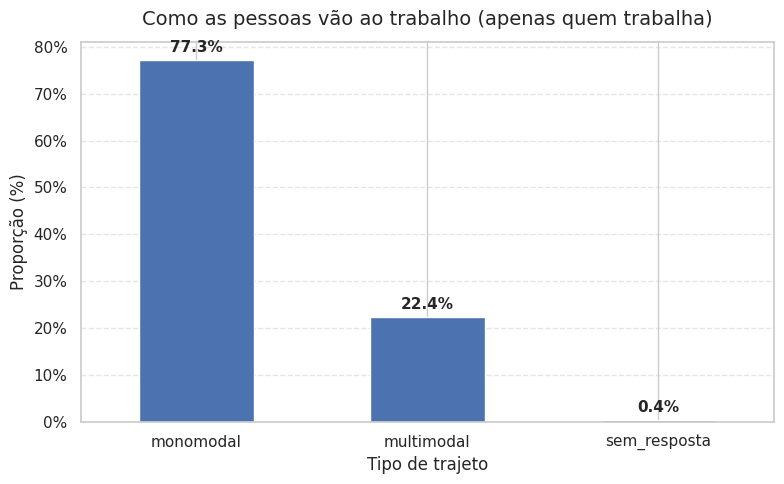

/tmp/ipython-input-1815432060.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])


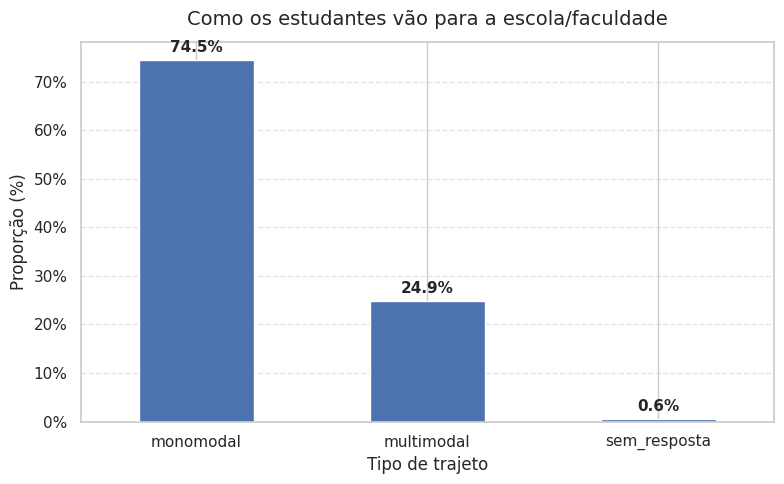

/tmp/ipython-input-1815432060.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])


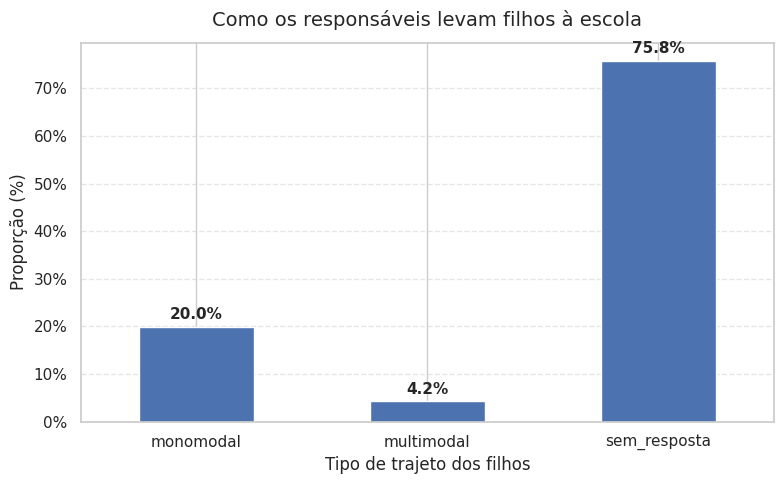

In [6]:
# =====================================================
# APRESENTAÇÃO DOS RESULTADOS
# =====================================================

import matplotlib.pyplot as plt

print("\n###############################################")
print("#        RESUMO GERAL       #")
print("###############################################\n")

# ---------- indicadores gerais ----------
pct_trabalham = df["trabalha_flag"].mean()
pct_estudam   = df["estuda_flag"].mean()
pct_terminal  = df["usa_terminal_trabalho"].mean()
pct_integracao_aula = df["usa_integracao_aula"].mean()

print("📊 Panorama geral da população analisada:\n")
print(f"• Aproximadamente {pct_trabalham:.1%} das pessoas entrevistadas trabalham.")
print(f"• Cerca de {pct_estudam:.1%} estudam (escola, curso técnico ou universidade).")
print(f"• Apenas {pct_terminal:.1%} utilizam algum Terminal de Integração no trajeto até o trabalho.")
print(f"• Somente {pct_integracao_aula:.1%} usam integração formal para ir à escola/faculdade.\n")

print("Esses números mostram que, embora muitas pessoas se desloquem diariamente,")
print("o uso da integração formal ainda é relativamente baixo.\n")


# ---------- distribuições globais de tipo de trajeto ----------
dist_trab   = df["tipo_trajeto_trabalho"].value_counts(normalize=True)
dist_aula   = df["tipo_trajeto_aula"].value_counts(normalize=True)
dist_filhos = df["tipo_trajeto_filhos"].value_counts(normalize=True)

print("###############################################")
print("#   COMO AS PESSOAS SE DESLOCAM (RESUMO)     #")
print("###############################################\n")

print("🚶‍♂️ Para ir ao trabalho:")
for k, v in (dist_trab * 100).round(1).items():
    print(f"   → {k}: {v}%")
print()

print("🎓 Para ir à escola/faculdade:")
for k, v in (dist_aula * 100).round(1).items():
    print(f"   → {k}: {v}%")
print()

print("👨‍👧 Para levar filhos à escola:")
for k, v in (dist_filhos * 100).round(1).items():
    print(f"   → {k}: {v}%")
print()

print("Esses resultados mostram quantas pessoas usam um único modo de transporte")
print("ou combinam vários no seu trajeto.\n")


# =====================================================
# VISUALIZAÇÕES MAIS BONITAS
# =====================================================

workers  = df[df["trabalha_flag"]]
students = df[df["estuda_flag"]]

def plot_bar_percent(series, title, xlabel="Tipo de trajeto"):
    """
    Plota um gráfico de barras com porcentagens e rótulos em cima das barras,
    em um layout mais agradável para apresentação.
    """
    categorias_ordem = ["monomodal", "multimodal", "sem_resposta"]
    series = series.reindex(categorias_ordem).dropna()

    plt.figure(figsize=(8, 5))
    ax = series.plot(kind="bar")

    ax.set_title(title, fontsize=14, pad=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel("Proporção (%)", fontsize=12)

    # grade leve no fundo para facilitar leitura
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    # deixar os rótulos do eixo X mais legíveis
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)

    # converter eixo Y em porcentagem
    vals = ax.get_yticks()
    ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])

    # adicionar porcentagem em cima das barras
    for i, v in enumerate(series):
        ax.text(
            i,
            v + 0.01,
            f"{v*100:.1f}%",
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold"
        )

    plt.tight_layout()
    plt.show()


# ---------- gráfico 1: tipo de trajeto ao trabalho ----------
dist_trab_workers = workers["tipo_trajeto_trabalho"].value_counts(normalize=True)
plot_bar_percent(
    dist_trab_workers,
    title="Como as pessoas vão ao trabalho (apenas quem trabalha)"
)

# ---------- gráfico 2: tipo de trajeto à aula ----------
dist_aula_students = students["tipo_trajeto_aula"].value_counts(normalize=True)
plot_bar_percent(
    dist_aula_students,
    title="Como os estudantes vão para a escola/faculdade"
)

# ---------- gráfico 3: tipo de trajeto dos filhos ----------
dist_filhos_all = df["tipo_trajeto_filhos"].value_counts(normalize=True)
plot_bar_percent(
    dist_filhos_all,
    title="Como os responsáveis levam filhos à escola",
    xlabel="Tipo de trajeto dos filhos"
)


###📊 Por que utilizamos gráficos de barras?

Optamos por utilizar gráficos de barras porque eles são uma das formas mais claras e intuitivas de comparar categorias distintas dentro de um conjunto de dados.
No nosso caso, o objetivo era visualizar como as pessoas se deslocam — se usam apenas um modo de transporte, combinam vários ou não responderam.

Os gráficos de barras são ideais aqui porque:

Mostram diferenças de forma rápida: basta olhar a altura das barras para entender qual tipo de trajeto é mais comum.

Facilitam a comparação direta entre categorias (ex.: monomodal vs multimodal).

Funcionam muito bem com proporções expressas em porcentagem.

Evitam ambiguidade — diferente de gráficos de pizza, onde pequenas diferenças podem ser difíceis de perceber.

Permitem inserir rótulos claros em cima das barras, ajudando o leitor a entender os valores sem precisar analisar eixos.

Em análises populacionais e de comportamento de deslocamento, como esta, gráficos de barras oferecem simplicidade, precisão e boa legibilidade, tornando-os a melhor escolha para comunicar resultados de maneira acessível para qualquer público.

# 🚴‍♂️ Qual o perfil dos usuários de integração entre modais?

In [7]:
print("--- ⚙️ PASSO 2: PROCESSAMENTO DE DADOS ---")

# 1. Funções de Limpeza
def classifica_modo(valor):
    if pd.isna(valor): return "sem_resposta"
    valor = str(valor).strip()
    if valor == "0" or valor == "": return "sem_resposta"
    if "," in valor: return "multimodal"
    return "monomodal"

# 2. Tratamento de Texto e Terminais
df['terminal_int_trabalho'] = df['terminal_int_trabalho'].astype(str).str.strip()
df['terminal_aula'] = df['terminal_aula'].astype(str).str.strip()

# 3. Filtro "Pega-Tudo" (Quem marcou Sim OU Quem escreveu nome de terminal)
df["usa_int_trabalho"] = (df["utiliza_terminal_int_trabalho"] == 1) | (df["terminal_int_trabalho"] != "0")
df["usa_int_aula"] = (df["utiliza_integracao_aula"] == 1) | (df["terminal_aula"] != "0")
df["usuario_integracao"] = df["usa_int_trabalho"] | df["usa_int_aula"]

# 4. Criando o Dataset Final
df_final = df[df["usuario_integracao"]].copy()
df_final = df_final[df_final['sexo'].isin([1, 2])] # Manter apenas Masc/Fem

# 5. Mapeamentos (Tradução)
map_sexo = {1: 'Masculino', 2: 'Feminino'}
map_faixa = {1: 'Até 6 anos', 2: '6 a 15 anos', 3: '16 a 24 anos', 4: '25 a 39 anos', 5: '40 a 59 anos', 6: '+ 60 anos'}
map_renda = {1: 'Até 1 SM', 2: '1-2 SM', 3: '2-3 SM', 4: '3-5 SM', 5: '5-10 SM', 6: '10-20 SM', 7: '> 20 SM', 8: 'Sem renda', 9: 'Não declarou'}

df_final['sexo_label'] = df_final['sexo'].map(map_sexo)
df_final['faixa_label'] = df_final['faixa_etaria'].map(map_faixa)
df_final['renda_label'] = df_final['renda'].map(map_renda)

# 6. Extração de Horários e Rotas
df_final['hora_trabalho'] = pd.to_datetime(df_final['horario_inicio_trabalho'], format='%H:%M:%S', errors='coerce').dt.hour
df_final['hora_aula'] = pd.to_datetime(df_final['horario_inicio_aula'], format='%H:%M:%S', errors='coerce').dt.hour
df_final['rota_trabalho'] = df_final['bairro_residencia'] + " ➝ " + df_final['bairro_trabalho']
df_final['rota_aula'] = df_final['bairro_residencia'] + " ➝ " + df_final['bairro_escola']

# Definição de Ordens para Gráficos
ordem_idade = ['Até 6 anos', '6 a 15 anos', '16 a 24 anos', '25 a 39 anos', '40 a 59 anos', '+ 60 anos']
ordem_renda = ['Sem renda', 'Até 1 SM', '1-2 SM', '2-3 SM', '3-5 SM', '5-10 SM', '10-20 SM', '> 20 SM']

print(f"✅ Dados processados! Total de usuários de integração: {len(df_final)}")

--- ⚙️ PASSO 2: PROCESSAMENTO DE DADOS ---
✅ Dados processados! Total de usuários de integração: 11299



📊 BLOCO 4 – ANÁLISE DEMOGRÁFICA (COM TABELAS ESTATÍSTICAS)


/tmp/ipython-input-25362641.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_stats.index, y=df_stats['Qtd'], palette=cor)


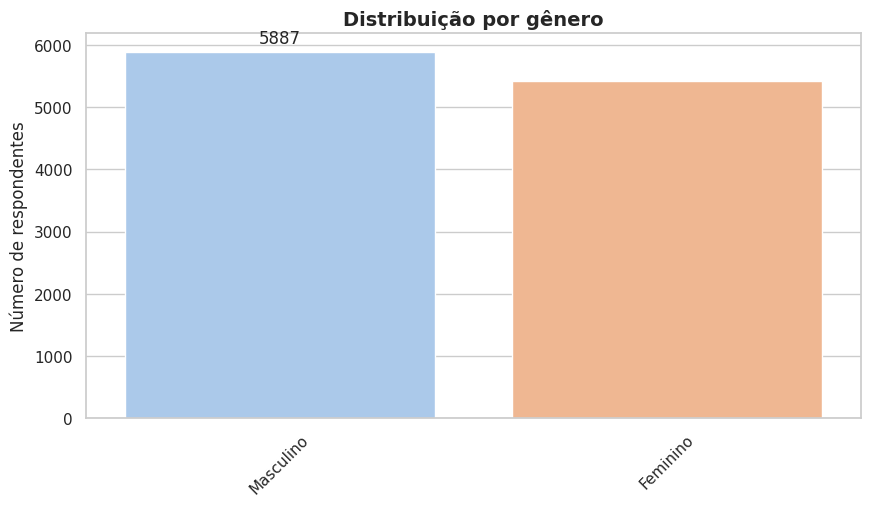


📋 TABELA RESUMO – Distribuição por gênero
----------------------------------------------------------------------
            Qtd      %
sexo_label            
Masculino  5887 52.10%
Feminino   5412 47.90%
----------------------------------------------------------------------




/tmp/ipython-input-25362641.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_stats.index, y=df_stats['Qtd'], palette=cor)


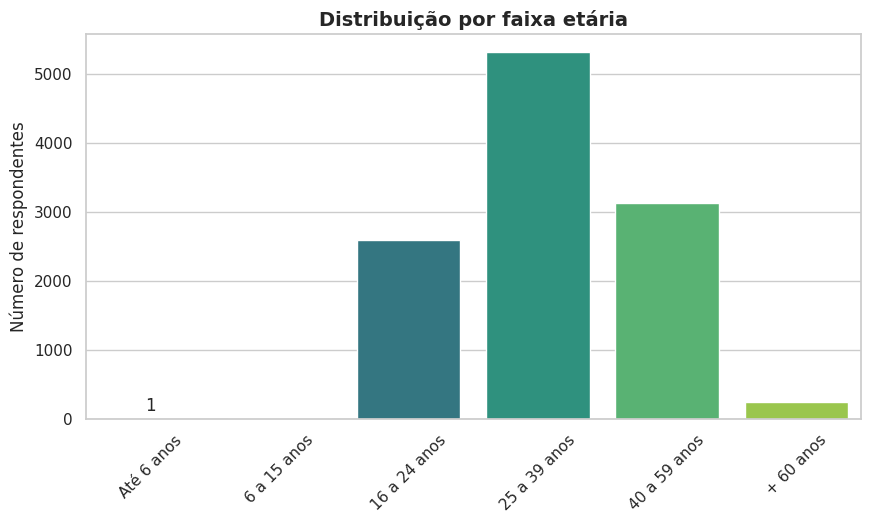


📋 TABELA RESUMO – Distribuição por faixa etária
----------------------------------------------------------------------
              Qtd      %
faixa_label             
Até 6 anos      1  0.01%
6 a 15 anos    13  0.12%
16 a 24 anos 2594 22.96%
25 a 39 anos 5313 47.02%
40 a 59 anos 3129 27.69%
+ 60 anos     249  2.20%
----------------------------------------------------------------------




/tmp/ipython-input-25362641.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_stats.index, y=df_stats['Qtd'], palette=cor)


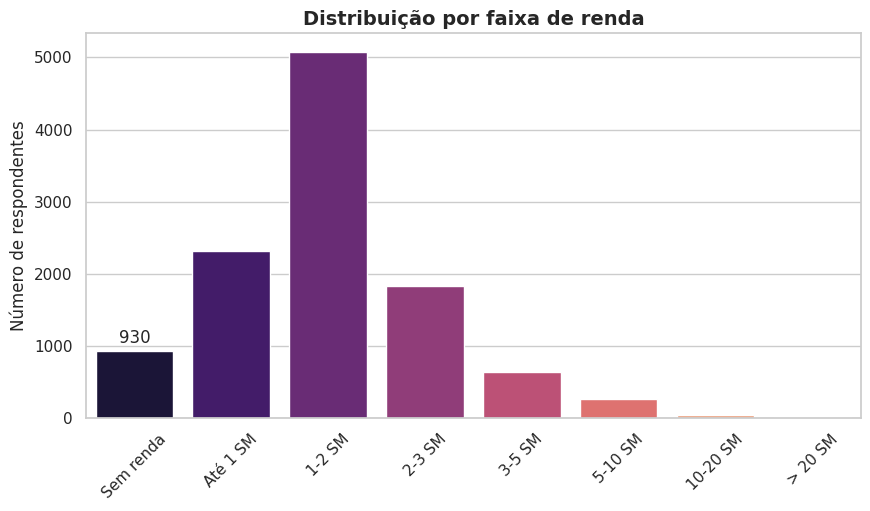


📋 TABELA RESUMO – Distribuição por faixa de renda
----------------------------------------------------------------------
             Qtd      %
renda_label            
Sem renda    930  8.23%
Até 1 SM    2324 20.57%
1-2 SM      5079 44.95%
2-3 SM      1839 16.28%
3-5 SM       635  5.62%
5-10 SM      273  2.42%
10-20 SM      41  0.36%
> 20 SM       12  0.11%
----------------------------------------------------------------------




/tmp/ipython-input-25362641.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_bairros.values, y=top_bairros.index, palette='coolwarm')


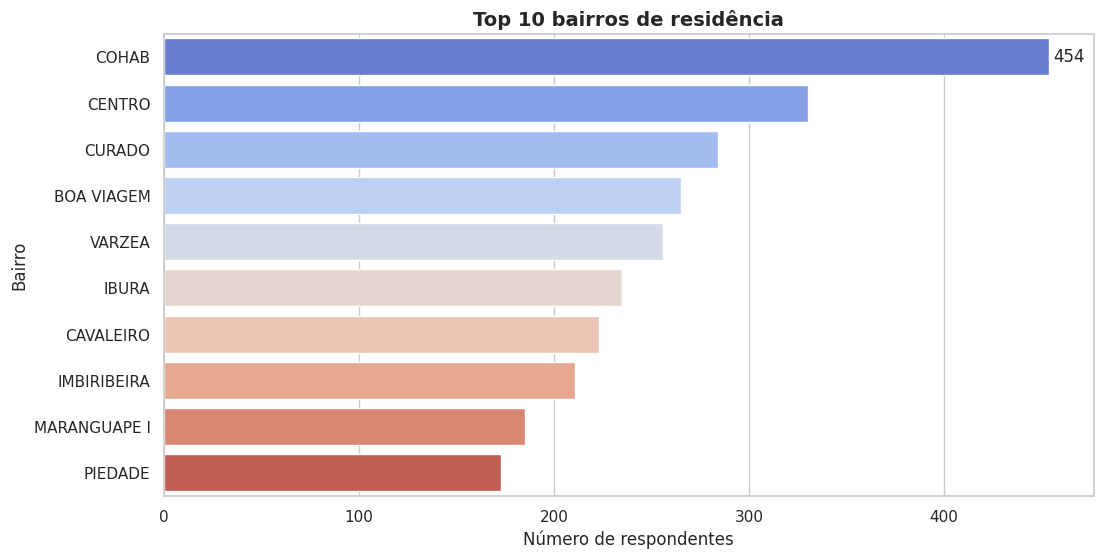


📋 TABELA RESUMO – Top 10 bairros de residência
----------------------------------------------------------------------
                  Qtd     %
bairro_residencia          
COHAB             454 4.02%
CENTRO            330 2.92%
CURADO            284 2.51%
BOA VIAGEM        265 2.35%
VARZEA            256 2.27%
IBURA             235 2.08%
CAVALEIRO         223 1.97%
IMBIRIBEIRA       211 1.87%
MARANGUAPE I      185 1.64%
PIEDADE           173 1.53%
----------------------------------------------------------------------


In [8]:
# ==============================================================================
# BLOCO 4: ANÁLISE DEMOGRÁFICA (COM TABELAS ESTATÍSTICAS)
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função Auxiliar para gerar Gráfico + Tabela
def analisar_categoria(titulo, dados, cor, ordem=None):
    # 1. Cálculo Estatístico
    contagem = dados.value_counts()
    if ordem:
        contagem = contagem.reindex(ordem).dropna()
    percentual = dados.value_counts(normalize=True) * 100

    # Tabela para exibição
    df_stats = pd.DataFrame({'Qtd': contagem, '%': percentual}).dropna()
    if ordem:
        df_stats = df_stats.reindex(ordem).dropna()

    # 2. Gráfico
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=df_stats.index, y=df_stats['Qtd'], palette=cor)
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.ylabel('Número de respondentes')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.bar_label(ax.containers[0], padding=3)
    plt.show()

    # 3. Tabela Textual (abaixo do gráfico)
    print(f"\n📋 TABELA RESUMO – {titulo}")
    print("-" * 70)
    print(
        df_stats.to_string(
            formatters={
                'Qtd': lambda x: f"{int(x)}",
                '%':  lambda x: f"{x:.2f}%"
            }
        )
    )
    print("-" * 70)
    print("\n")

# --- EXECUÇÃO DAS ANÁLISES ---

print("\n" + "=" * 80)
print("📊 BLOCO 4 – ANÁLISE DEMOGRÁFICA (COM TABELAS ESTATÍSTICAS)")
print("=" * 80)

# 1. Gênero
analisar_categoria(
    "Distribuição por gênero",
    df_final['sexo_label'],
    "pastel"
)

# 2. Faixa Etária
analisar_categoria(
    "Distribuição por faixa etária",
    df_final['faixa_label'],
    "viridis",
    ordem=ordem_idade
)

# 3. Renda
analisar_categoria(
    "Distribuição por faixa de renda",
    df_final['renda_label'],
    "magma",
    ordem=ordem_renda
)

# 4. Bairros (Top 10)
# Para bairros fazemos um tratamento especial (horizontal)
top_bairros = df_final['bairro_residencia'].value_counts().head(10)
top_bairros_pct = df_final['bairro_residencia'].value_counts(normalize=True).head(10) * 100
df_bairros = pd.DataFrame({'Qtd': top_bairros, '%': top_bairros_pct})

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_bairros.values, y=top_bairros.index, palette='coolwarm')
plt.title("Top 10 bairros de residência", fontsize=14, fontweight='bold')
plt.xlabel("Número de respondentes")
plt.ylabel("Bairro")
plt.bar_label(ax.containers[0], padding=3)
plt.show()

print("\n📋 TABELA RESUMO – Top 10 bairros de residência")
print("-" * 70)
print(
    df_bairros.to_string(
        formatters={
            'Qtd': lambda x: f"{int(x)}",
            '%':  lambda x: f"{x:.2f}%"
        }
    )
)
print("-" * 70)


#🚗 Como é a participação de aplicativos de transporte ?

🚕 Intensidade de Uso dos Aplicativos de Transporte

🔹 Trabalho:
   • Nunca: 0.2%
   • Às vezes: 0.4%
   • Sempre: 0.6%
   • Não declarado: 98.9%

🔹 Estudo:
   • Nunca: 0.1%
   • Às vezes: 0.2%
   • Sempre: 0.2%
   • Não declarado: 99.4%

🔹 Filhos:
   • Nunca: 0.1%
   • Às vezes: 0.1%
   • Sempre: 0.1%
   • Não declarado: 99.7%



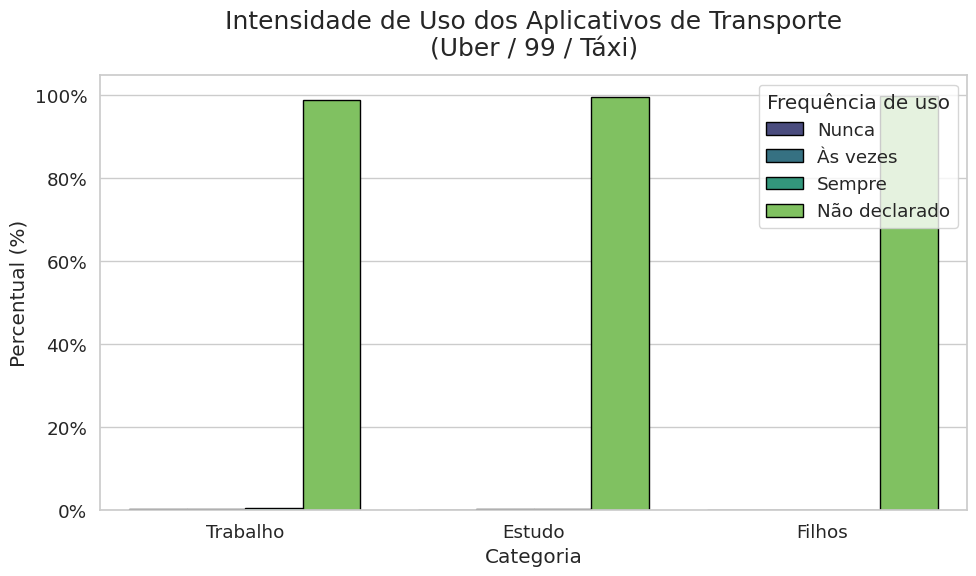

In [9]:
# =======================================================
# ANÁLISE CORRETA: Participação e Intensidade de Uso
# dos Aplicativos de Transporte (Uber / 99 / Táxi)
# =======================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="whitegrid", font_scale=1.2)

# Colunas relevantes
cols_apps = {
    "Trabalho": "utiliza_app_taxi_trabalho",
    "Estudo": "utiliza_app_taxi_aula",
    "Filhos": "utiliza_app_taxi_escola"
}

# Função para transformar valores
mapa = {
    0: "Não declarado",
    1: "Nunca",
    2: "Às vezes",
    3: "Sempre"
}

# ------------------ Gerar tabelas ------------------
tabelas = {}

for categoria, coluna in cols_apps.items():
    tabelas[categoria] = (
        df[coluna]
        .map(mapa)
        .value_counts(normalize=True)
        .reindex(["Nunca", "Às vezes", "Sempre", "Não declarado"])
        .dropna()
    )

# ------------------ Mostrar valores ------------------
print("===================================================")
print("🚕 Intensidade de Uso dos Aplicativos de Transporte")
print("===================================================\n")

for categoria, tabela in tabelas.items():
    print(f"🔹 {categoria}:")
    for k, v in tabela.items():
        print(f"   • {k}: {v:.1%}")
    print()

# ------------------ Gráfico comparativo ------------------
# Transformar tudo em um DataFrame organizado
linhas = []

for categoria, tabela in tabelas.items():
    for resposta, valor in tabela.items():
        linhas.append([categoria, resposta, valor])

df_plot = pd.DataFrame(linhas, columns=["Categoria", "Resposta", "Proporção"])

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df_plot,
    x="Categoria",
    y="Proporção",
    hue="Resposta",
    palette="viridis",
    edgecolor="black"
)

ax.set_title("Intensidade de Uso dos Aplicativos de Transporte\n(Uber / 99 / Táxi)", fontsize=18, pad=14)
ax.set_ylabel("Percentual (%)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y*100:.0f}%"))

plt.legend(title="Frequência de uso")
plt.tight_layout()
plt.show()


#🚅 Quais tipos de modais são ultilizados por diferentes grupos ?

Modal Share – Viagem ao Trabalho

• Ônibus: 43.8% ( 23416 registros )
• Carro (dirigindo): 25.7% ( 13757 registros )
• Metrô: 8.0% ( 4304 registros )
• A pé: 5.4% ( 2909 registros )
• Motocicleta: 4.8% ( 2576 registros )
• Carona familiar: 3.4% ( 1806 registros )
• Bicicleta: 2.8% ( 1509 registros )
• Outro: 2.5% ( 1348 registros )
• Carona amigo/colega: 1.6% ( 849 registros )
• Táxi: 1.2% ( 641 registros )
• Carro com motorista: 0.5% ( 276 registros )
• Fretado: 0.2% ( 100 registros )
• Transporte escolar: 0.0% ( 22 registros )


Modal Share – Viagem à Aula

• Ônibus: 33.3% ( 10639 registros )
• A pé: 18.7% ( 5969 registros )
• Carro (dirigindo): 14.5% ( 4633 registros )
• Carona familiar: 11.2% ( 3566 registros )
• Transporte escolar: 4.8% ( 1525 registros )
• Metrô: 4.0% ( 1269 registros )
• Outro: 3.5% ( 1107 registros )
• Carona amigo/colega: 3.1% ( 1000 registros )
• Bicicleta: 2.9% ( 919 registros )
• Motocicleta: 1.8% ( 587 registros )
• Carro com motorista: 1.1% ( 353 registro

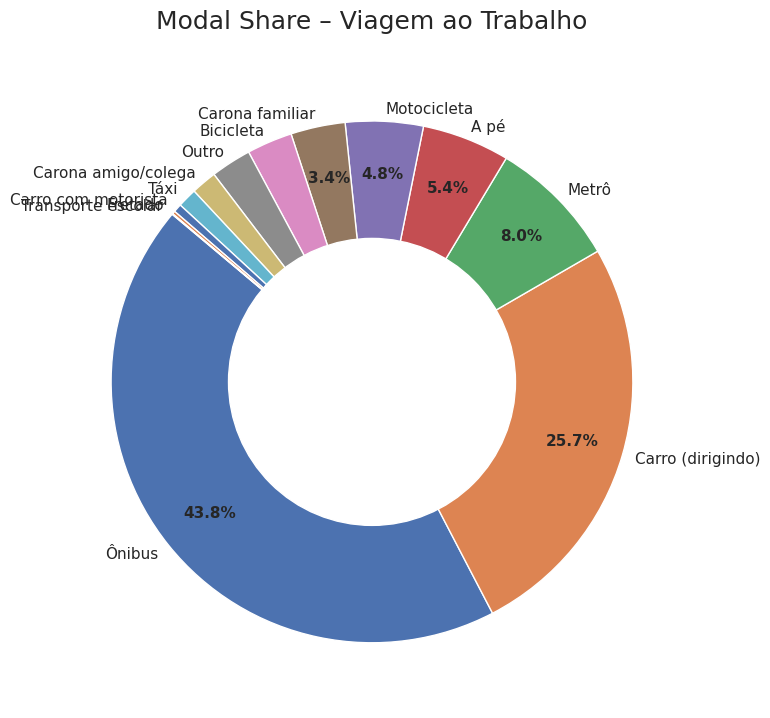

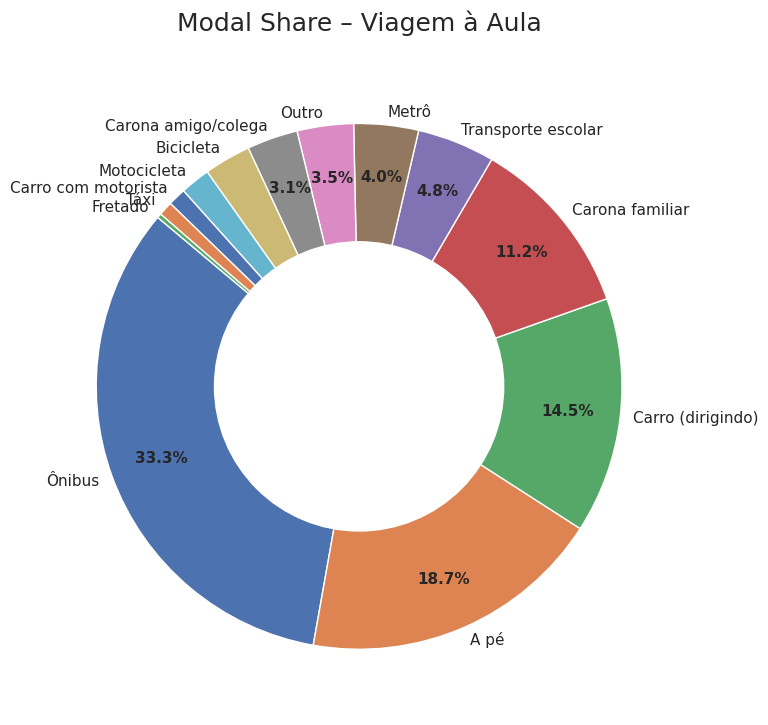

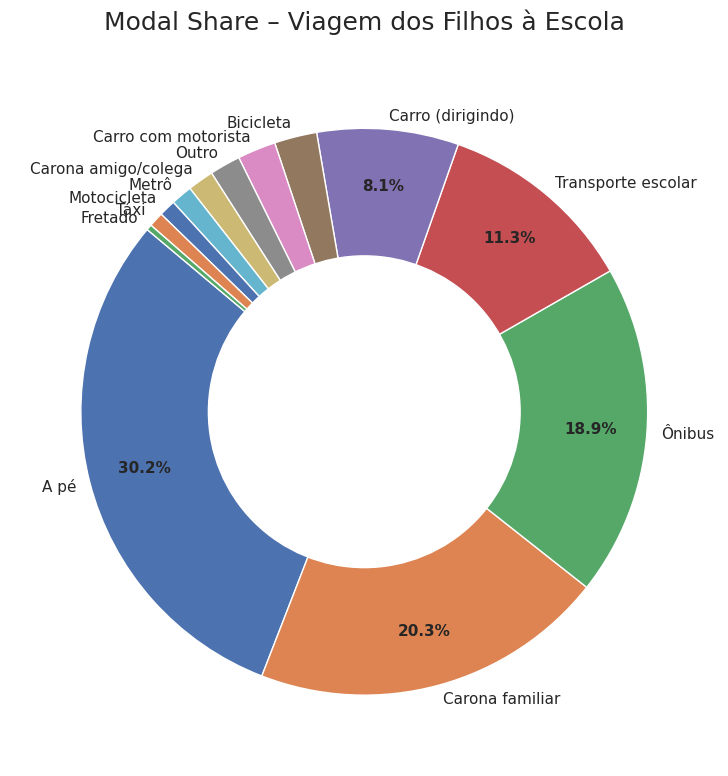

In [10]:
# ================================================================
# MODAL SHARE (Trabalho, Aula, Filhos) - Texto + Gráficos Bonitos
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt

# Mapeamento dos códigos de modal
mapa_modal = {
    0: "Não declarado",
    1: "A pé",
    2: "Bicicleta",
    3: "Ônibus",
    4: "Metrô",
    5: "Carro (dirigindo)",
    6: "Carona familiar",
    7: "Carona amigo/colega",
    8: "Carro com motorista",
    9: "Motocicleta",
    10: "Transporte escolar",
    11: "Táxi",
    12: "Fretado"
}

def contar_modais(col):
    """
    Lê uma coluna com valores como:
    '3', '3, 5', '1, 2, 3'
    e retorna uma Série com a contagem de cada modal (já com nome).
    """
    lista = []
    for linha in df[col].dropna():
        linha = str(linha).strip()
        if linha == "" or linha == "0":
            continue
        for m in linha.split(","):
            try:
                codigo = int(m.strip())
                lista.append(mapa_modal.get(codigo, "Outro"))
            except ValueError:
                continue
    if not lista:
        return pd.Series(dtype=int)
    return pd.Series(lista).value_counts().sort_values(ascending=False)


def print_modal_text(titulo, series):
    """
    Imprime um resumo textual amigável do modal share.
    """
    total = series.sum()
    print("=======================================")
    print(titulo)
    print("=======================================\n")
    for modal, qtd in series.items():
        pct = qtd / total * 100
        print(f"• {modal}: {pct:.1f}% ( {qtd} registros )")
    print("\n")


def plot_pizza_bonita(series, titulo):
    """
    Gráfico de pizza em formato mais 'apresentável':
    - figura maior
    - pizza em formato 'donut'
    - porcentagens apenas em fatias relevantes
    """
    if series.empty:
        print(f"[AVISO] Sem dados suficientes para: {titulo}")
        return

    valores = series.values
    labels = series.index

    # função pra exibir % só quando fizer sentido
    def autopct_format(pct):
        return f"{pct:.1f}%" if pct >= 3 else ""

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        valores,
        labels=labels,
        autopct=autopct_format,
        startangle=140,
        pctdistance=0.80,   # aproxima o texto pro centro
        labeldistance=1.05  # distancia do label pra borda
    )

    # deixa os textos mais legíveis
    for text in texts:
        text.set_fontsize(11)
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_weight("bold")

    # transforma em 'donut chart' colocando um círculo branco no centro
    centro = plt.Circle((0, 0), 0.55, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centro)

    plt.title(titulo, fontsize=18, pad=20)
    plt.tight_layout()
    plt.show()


# =======================
# 1) Calcular modal share
# =======================

modal_trabalho = contar_modais("meio_transporte_trab")
modal_aula     = contar_modais("transporte_aula")
modal_filhos   = contar_modais("meios_transporte_filhos")

# =======================
# 2) Impressão textual
# =======================

print_modal_text("Modal Share – Viagem ao Trabalho", modal_trabalho)
print_modal_text("Modal Share – Viagem à Aula", modal_aula)
print_modal_text("Modal Share – Viagem dos Filhos à Escola", modal_filhos)

# =======================
# 3) Gráficos de pizza bonitos
# =======================

plot_pizza_bonita(modal_trabalho, "Modal Share – Viagem ao Trabalho")
plot_pizza_bonita(modal_aula, "Modal Share – Viagem à Aula")
plot_pizza_bonita(modal_filhos, "Modal Share – Viagem dos Filhos à Escola")


#🛣️ Como a localização de residência (cidade/bairro) impacta no modal escolhido?

=== Resumo textual – Modal por Bairro (Trabalho) ===

Distribuição de modais (somando os 20 bairros com mais registros):
- A pé: 1255 registros (6.0% dos usos)
- Bicicleta: 669 registros (3.2% dos usos)
- Carona amigo: 541 registros (2.6% dos usos)
- Carona familiar: 1013 registros (4.8% dos usos)
- Carro dirigindo: 7637 registros (36.3% dos usos)
- Carro motorista: 156 registros (0.7% dos usos)
- Escolar: 16 registros (0.1% dos usos)
- Fretado: 46 registros (0.2% dos usos)
- Metrô: 1297 registros (6.2% dos usos)
- Moto: 799 registros (3.8% dos usos)
- Táxi: 397 registros (1.9% dos usos)
- Ônibus: 7218 registros (34.3% dos usos)

Modal mais utilizado em cada bairro (dentre os 20 principais):
- BOA VIAGEM: modal mais usado = Carro dirigindo (2247 registros)
- VARZEA: modal mais usado = Ônibus (615 registros)
- CASA AMARELA: modal mais usado = Carro dirigindo (590 registros)
- GRACAS: modal mais usado = Carro dirigindo (562 registros)
- MADALENA: modal mais usado = Carro dirigindo (563 r

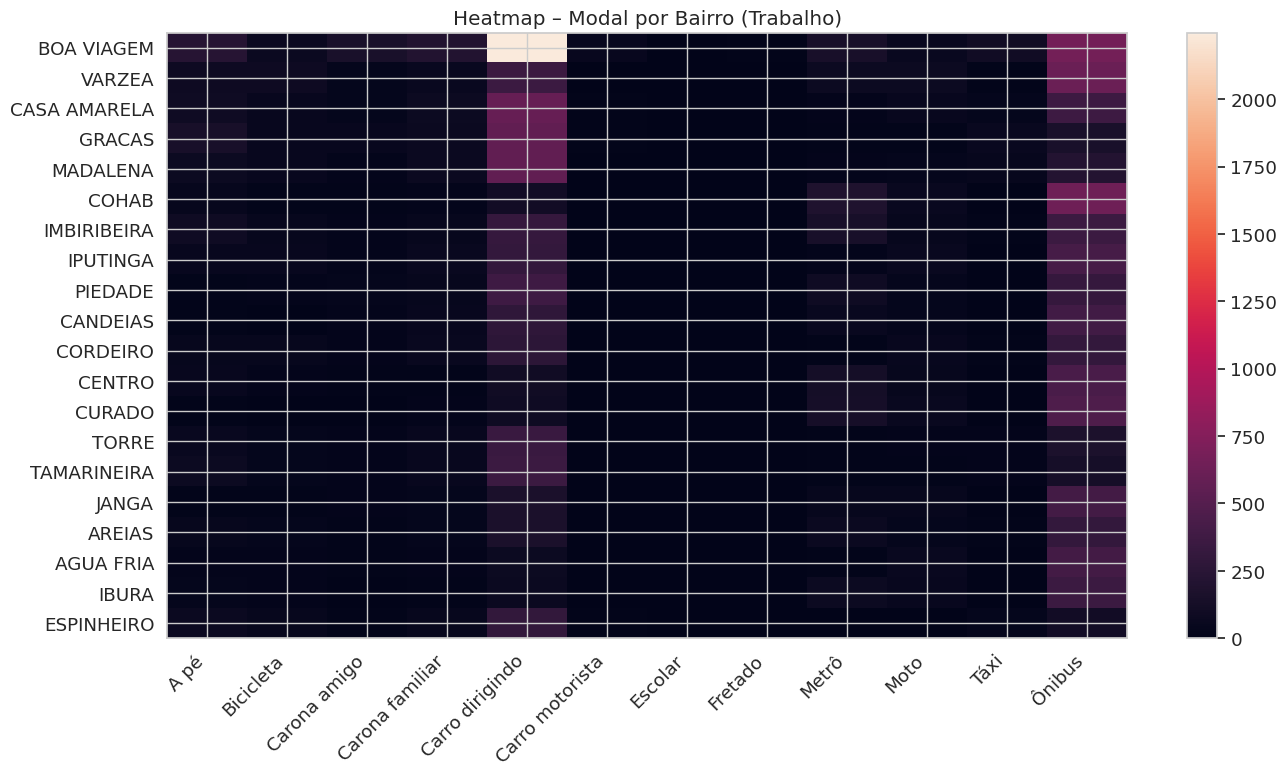

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# 2. Função robusta para limpar modais
# ==========================================================
def clean_modal(value):
    """Limpa valores contendo listas de modais e corrige erros como '2005' → '5'."""
    if pd.isna(value):
        return []

    raw = str(value).replace(" ", "").split(",")

    cleaned = []
    for v in raw:
        if v.isdigit():
            num = int(v)

            # Corrigir valores inválidos como 2005 → 5
            if num > 12:
                num = int(str(num)[-1])

            if 1 <= num <= 12:
                cleaned.append(num)

    return cleaned

# ==========================================================
# 3. Aplicar limpeza na coluna de modal do trabalho
# ==========================================================
df["modal_trabalho_list"] = df["meio_transporte_trab"].apply(clean_modal)

# Explodir linhas (uma linha por modal)
df_trab = df.explode("modal_trabalho_list")
df_trab = df_trab[df_trab["modal_trabalho_list"].notna()]

# ==========================================================
# 4. Mapear números → nomes de modais
# ==========================================================
modal_map = {
    1:"A pé", 2:"Bicicleta", 3:"Ônibus", 4:"Metrô",
    5:"Carro dirigindo", 6:"Carona familiar", 7:"Carona amigo",
    8:"Carro motorista", 9:"Moto", 10:"Escolar",
    11:"Táxi", 12:"Fretado"
}

df_trab["modal"] = df_trab["modal_trabalho_list"].map(modal_map)

# ==========================================================
# 5. Crosstab para criar matriz bairro × modal
# ==========================================================
tabela = pd.crosstab(df_trab["bairro_residencia"], df_trab["modal"])

# Selecionar os 20 bairros com mais registros
top_bairros = tabela.sum(axis=1).sort_values(ascending=False).head(20).index
tabela_top = tabela.loc[top_bairros]

# ==========================================================
# 5.1 Resumo textual das informações do heatmap
# ==========================================================
print("=== Resumo textual – Modal por Bairro (Trabalho) ===\n")

# Total geral
total_geral = tabela_top.values.sum()

# Distribuição por modal (nos 20 bairros principais)
print("Distribuição de modais (somando os 20 bairros com mais registros):")
for modal in tabela_top.columns:
    total_modal = tabela_top[modal].sum()
    perc = (total_modal / total_geral * 100) if total_geral > 0 else 0
    print(f"- {modal}: {total_modal} registros ({perc:.1f}% dos usos)")

print("\nModal mais utilizado em cada bairro (dentre os 20 principais):")
for bairro, row in tabela_top.iterrows():
    if row.sum() == 0:
        continue
    modal_top = row.idxmax()
    valor_top = row.max()
    print(f"- {bairro}: modal mais usado = {modal_top} ({valor_top} registros)")

# ==========================================================
# 6. Plotar HEATMAP
# ==========================================================
plt.figure(figsize=(14,8))

plt.imshow(tabela_top, aspect="auto")
plt.colorbar()

plt.xticks(
    ticks=np.arange(len(tabela_top.columns)),
    labels=tabela_top.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(tabela_top.index)),
    labels=tabela_top.index
)

plt.title("Heatmap – Modal por Bairro (Trabalho)")
plt.tight_layout()
plt.show()


###📊 Por que utilizamos heatmap?

O heatmap foi escolhido porque ele permite visualizar de forma clara e imediata a intensidade de uso de cada modal de transporte em diferentes bairros. Como estamos lidando com uma matriz grande — bairros nas linhas e modais nas colunas — um gráfico de barras se tornaria confuso e pouco informativo.

O heatmap, por outro lado:

Destaca padrões e concentrações por meio das cores, facilitando identificar rapidamente onde determinado modal é mais utilizado.

Permite comparar bairros entre si sem precisar olhar valores individuais. As variações de cor mostram a presença forte ou fraca de cada modal.

É ideal para dados matriciais, como tabelas resultantes de crosstab, onde a informação está distribuída em múltiplas categorias ao mesmo tempo.

Ajuda a revelar tendências e agrupamentos, como bairros com perfis semelhantes de transporte ou modais que se concentram em regiões específicas.

Em resumo, o heatmap é a escolha mais eficiente para representar esse tipo de dado porque traduz grandes quantidades de informação num formato visual intuitivo, favorecendo uma análise mais rápida, comparativa e profunda.

#🚏Frequência de integração entre modais

✅ Combinações de modais extraídas e contadas! Total de combinações: 17757


###############################################
#  TOP 10 COMBINAÇÕES DE MODAIS MULTIMODAIS   #
###############################################

1. Metrô + Ônibus: 4242 ocorrências (23.89%)
2. Carro (dirigindo) + Ônibus: 1465 ocorrências (8.25%)
3. A pé + Ônibus: 1281 ocorrências (7.21%)
4. Carona familiar + Ônibus: 1212 ocorrências (6.83%)
5. A pé + Carona familiar: 664 ocorrências (3.74%)
6. Carona amigo/colega + Ônibus: 579 ocorrências (3.26%)
7. A pé + Carro (dirigindo): 406 ocorrências (2.29%)
8. A pé + Metrô + Ônibus: 355 ocorrências (2.00%)
9. Bicicleta + Ônibus: 342 ocorrências (1.93%)
10. A pé + Bicicleta: 306 ocorrências (1.72%)

Esses são os 10 arranjos mais comuns de transportes utilizados em viagens multimodais.


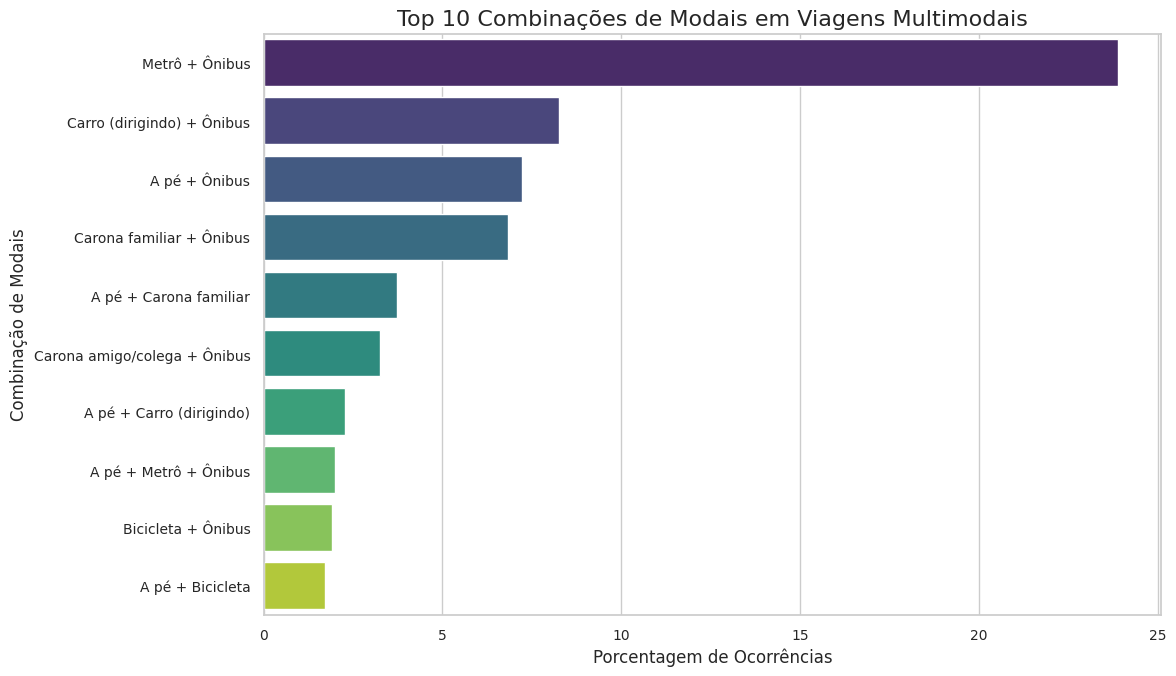


Análise das combinações de modais concluída.


In [12]:
from collections import Counter
import pandas as pd # Ensure pandas is imported
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import seaborn as sns # Ensure seaborn is imported

# Mapeamento dos códigos de modal (redefinido para garantir disponibilidade)
# This mapping should be consistent with the one used in k0q7voazbM-0
mapa_modal = {
    0: "Não declarado",
    1: "A pé",
    2: "Bicicleta",
    3: "Ônibus",
    4: "Metrô",
    5: "Carro (dirigindo)",
    6: "Carona familiar",
    7: "Carona amigo/colega",
    8: "Carro com motorista",
    9: "Motocicleta",
    10: "Transporte escolar",
    11: "Táxi",
    12: "Fretado"
}

# Funções de Limpeza (redefinida para garantir disponibilidade)
def clean_modal(value):
    """Limpa valores contendo listas de modais e corrige erros como '2005' → '5'."""
    if pd.isna(value):
        return []

    raw = str(value).replace(" ", "").split(",")

    cleaned = []
    for v in raw:
        if v.isdigit():
            num = int(v)

            # Corrigir valores inválidos como 2005 → 5
            if num > 12:
                num = int(str(num)[-1])

            if 1 <= num <= 12: # As per existing logic, only valid codes 1-12
                cleaned.append(num)

    return cleaned

# Função para classificar monomodal/multimodal (re-adicionada para garantir disponibilidade)
def classifica_modo(valor):
    if pd.isna(valor):
        return "sem_resposta"
    valor = str(valor).strip()
    if valor == "0" or valor == "":
        return "sem_resposta"
    if "," in valor:
        return "multimodal"
    return "monomodal"

# Re-aplicar a criação das colunas tipo_trajeto ao DataFrame df (necessário devido à recarga do df em célula anterior)
df["tipo_trajeto_trabalho"] = df["meio_transporte_trab"].map(classifica_modo)
df["tipo_trajeto_aula"]     = df["transporte_aula"].map(classifica_modo)
df["tipo_trajeto_filhos"]   = df["meios_transporte_filhos"].map(classifica_modo)

all_modal_combinations = []

# Collect multimodal combinations for work, study, and children's school trips
# Filter for multimodal trips and then clean the modal string to get numerical codes
# Then map codes to names and store as frozensets

# Processar trajeto ao trabalho
multimodal_trab_df = df[df["tipo_trajeto_trabalho"] == "multimodal"]
for modals_str in multimodal_trab_df["meio_transporte_trab"].dropna():
    modals = clean_modal(modals_str)
    if len(modals) > 1: # Only include actual combinations of more than one modal
        modal_names = [mapa_modal.get(m, "Outro") for m in modals]
        all_modal_combinations.append(frozenset(modal_names))

# Processar trajeto à aula
multimodal_aula_df = df[df["tipo_trajeto_aula"] == "multimodal"]
for modals_str in multimodal_aula_df["transporte_aula"].dropna():
    modals = clean_modal(modals_str)
    if len(modals) > 1:
        modal_names = [mapa_modal.get(m, "Outro") for m in modals]
        all_modal_combinations.append(frozenset(modal_names))

# Processar trajeto dos filhos
multimodal_filhos_df = df[df["tipo_trajeto_filhos"] == "multimodal"]
for modals_str in multimodal_filhos_df["meios_transporte_filhos"].dropna():
    modals = clean_modal(modals_str)
    if len(modals) > 1:
        modal_names = [mapa_modal.get(m, "Outro") for m in modals]
        all_modal_combinations.append(frozenset(modal_names))

# Contar as ocorrências de cada combinação
combination_counts = Counter(all_modal_combinations)

# Converter frozenset para string para melhor visualização (ex: "Ônibus + Metrô")
formatted_combinations = {
    " + ".join(sorted(list(k))): v for k, v in combination_counts.items()
}

# Converter para DataFrame para facilitar manipulação e ordenação
df_combinations = pd.DataFrame(formatted_combinations.items(), columns=['Combinacao', 'Contagem'])
# The original notebook had a simplification of 'Carro (dirigindo)' to 'Carro' in mapa_modal
# and then replaces 'Carro (dirigindo)' again here. This is not strictly needed if mapa_modal is consistent
# but keeping it for consistency with the original user code.
df_combinations['Combinacao'] = df_combinations['Combinacao'].replace('Carro (dirigindo)', 'Carro', regex=False)
df_combinations['Combinacao'] = df_combinations['Combinacao'].replace('Carro com motorista', 'Carro (Motorista)', regex=False)
df_combinations = df_combinations.sort_values(by='Contagem', ascending=False).reset_index(drop=True)

total_combinations = df_combinations['Contagem'].sum()
df_combinations['Porcentagem'] = (df_combinations['Contagem'] / total_combinations) * 100

print(f"\u2705 Combinações de modais extraídas e contadas! Total de combinações: {total_combinations}\n")

# --- 📑 Exibir resumo textual das combinações mais frequentes ---
print("\n###############################################")
print("#  TOP 10 COMBINAÇÕES DE MODAIS MULTIMODAIS   #")
print("###############################################\n")

top_n = 10
for index, row in df_combinations.head(top_n).iterrows():
    print(f"{index+1}. {row['Combinacao']}: {row['Contagem']} ocorrências ({row['Porcentagem']:.2f}%)")

print(f"\nEsses são os {top_n} arranjos mais comuns de transportes utilizados em viagens multimodais.")


# --- 📊 Visualizar as combinações mais frequentes ---

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_combinations.head(top_n),
    x='Porcentagem',
    y='Combinacao',
    hue='Combinacao', # Added to address FutureWarning
    palette='viridis',
    legend=False # Added to address FutureWarning
)
plt.title(f'Top {top_n} Combinações de Modais em Viagens Multimodais', fontsize=16)
plt.xlabel('Porcentagem de Ocorrências', fontsize=12)
plt.ylabel('Combinação de Modais', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("\nAnálise das combinações de modais concluída.")

# 🔍Distribuição modal segmentada por perfil demográfico e localização

In [13]:
# --- Célula 1: Configuração, Limpeza e Preparação do DataFrame Principal ---
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# --- 1. Mapeamentos e Constantes (Nomes Curtos Corrigidos) ---
col_modal_trabalho_name = 'meio_transporte_trab'
col_cidade_residencia_name = 'cidade_residencia'
col_bairro_residencia_name = 'bairro_residencia'
col_sexo_name = 'sexo'
col_idade_name = 'faixa_etaria'
col_renda_name = 'renda'

# Mapeamento robusto dos modais (mantém a granularidade)
mapa_modal = {
    0: "Não declarado", 1: "A pé", 2: "Bicicleta", 3: "Ônibus", 4: "Metrô",
    5: "Carro (dirigindo)", 6: "Carona familiar", 7: "Carona amigo/colega",
    8: "Carro com motorista", 9: "Motocicleta", 10: "Transporte escolar",
    11: "Táxi", 12: "Fretado"
}

map_sexo = {1: 'Masculino', 2: 'Feminino'}
map_faixa_etaria = {1: 'Até 6 anos', 2: '6 a 15 anos', 3: '16 a 24 anos', 4: '25 a 39 anos', 5: '40 a 59 anos', 6: 'Acima de 60 anos'}
map_renda = {1: 'Até 1 SM', 2: '1 a 2 SM', 3: '2 a 3 SM', 4: '3 a 5 SM', 5: '5 a 10 SM', 6: '10 a 20 SM', 7: '+ 20 SM', 8: 'Sem rendimento', 9: 'Sem declaração'}

# --- 2. Funções de Limpeza ---
def clean_modal(value):
    if pd.isna(value): return []
    raw = str(value).replace(" ", "").split(",")
    cleaned = []
    for v in raw:
        if v.isdigit():
            num = int(v)
            if num > 12: num = int(str(num)[-1])
            if 0 <= num <= 12: cleaned.append(num)
    return cleaned

top_cidades = ['RECIFE', 'OLINDA', 'JABOATAO DOS GUARARAPES', 'PAULISTA']
def limpar_cidade(nome):
    if pd.isna(nome): return 'Desconhecido'
    nome = nome.strip().upper()
    for city in top_cidades:
        if city in nome: return city.split()[0].title()
    return 'Outras'

# --- 3. Carregamento e Transformação ---
df = pd.read_csv('/content/dataset2.csv', sep=',', encoding='latin1')
df.columns = df.columns.str.strip()

df_modal_exploded = df.copy()
df_modal_exploded["modal_list"] = df_modal_exploded[col_modal_trabalho_name].apply(clean_modal)
df_modal_exploded = df_modal_exploded.explode("modal_list")
df_modal_exploded = df_modal_exploded[df_modal_exploded["modal_list"].notna()]
df_modal_exploded["modal_list"] = df_modal_exploded["modal_list"].astype(int)

df_modal_exploded["Modal_Nome"] = df_modal_exploded["modal_list"].map(mapa_modal) # COLUNA GRANULAR

# Aplica Mapeamentos de Segmentação
df_modal_exploded['Cidade_Residencia_Clean'] = df_modal_exploded[col_cidade_residencia_name].apply(limpar_cidade)
df_modal_exploded['Sexo_Desc'] = df_modal_exploded[col_sexo_name].map(map_sexo)
df_modal_exploded['Faixa_Etaria_Desc'] = df_modal_exploded[col_idade_name].map(map_faixa_etaria)
df_modal_exploded['Renda_Desc'] = df_modal_exploded[col_renda_name].map(map_renda)

# DataFrame Final de Análise Limpa (Focando em modais válidos)
modais_validos = ['Ônibus', 'Metrô', 'Carro (dirigindo)', 'A pé', 'Motocicleta', 'Carona familiar', 'Táxi', 'Bicicleta', 'Fretado', 'Carona amigo/colega', 'Carro com motorista', 'Transporte escolar']
df_analise = df_modal_exploded[df_modal_exploded['Modal_Nome'].isin(modais_validos)].copy()

print("✅ Preparação de dados com modais granulares concluída. O DataFrame 'df_analise' está pronto.")

/tmp/ipython-input-4200211590.py:47: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/dataset2.csv', sep=',', encoding='latin1')


✅ Preparação de dados com modais granulares concluída. O DataFrame 'df_analise' está pronto.


✅ Tabela de distribuição modal GRANULAR por cidade de residência:
Modal_Nome               A pé  Bicicleta  Carona amigo/colega  \
Cidade_Residencia_Clean                                         
Jaboatao                  3.3        1.2                  1.4   
Olinda                    1.5        1.7                  2.4   
Outras                    3.7        1.4                  1.5   
Paulista                  1.7        0.6                  2.1   
Recife                    7.1        3.8                  2.3   

Modal_Nome               Carona familiar  Carro (dirigindo)  \
Cidade_Residencia_Clean                                       
Jaboatao                             2.4               15.8   
Olinda                               4.3               22.1   
Outras                               2.2               13.8   
Paulista                             3.6               16.2   
Recife                               4.4               32.5   

Modal_Nome               Carro com m

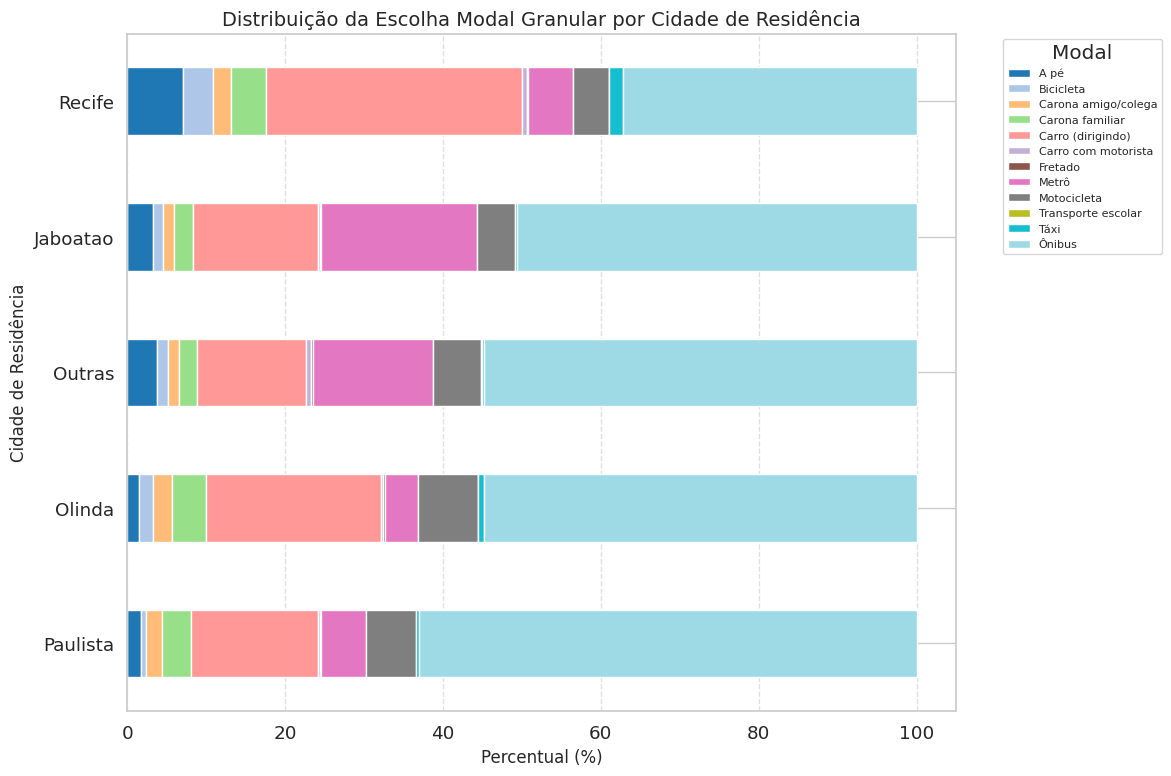

In [14]:
# CÓDIGO DA CÉLULA 2
distribuicao_cidade = pd.crosstab(
    df_analise['Cidade_Residencia_Clean'],
    df_analise['Modal_Nome'],
    normalize='index'
) * 100

print("✅ Tabela de distribuição modal GRANULAR por cidade de residência:")
print(distribuicao_cidade.round(1).head())

plt.figure(figsize=(12, 8))
distribuicao_cidade.sort_values(by='Ônibus', ascending=False).plot(
    kind='barh',
    stacked=True,
    colormap='tab20',
    ax=plt.gca()
)

plt.title('Distribuição da Escolha Modal Granular por Cidade de Residência', fontsize=14)
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Cidade de Residência', fontsize=12)
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Conclusões Analíticas: Localização (Cidade)
# 1.  **Dependência do Ônibus:** Cidades adjacentes como **Olinda** e **Jaboatão** são as mais dependentes do Ônibus, refletindo o alto fluxo pendular metropolitano.
# 2.  **Uso do Carro:** **Recife** tem a maior participação de **Carro (dirigindo)** e a menor participação de Ônibus, um indicador de concentração de ativos e renda na capital.

In [15]:
# CÓDIGO DA CÉLULA 3
# 1. Filtrar apenas os registros onde a cidade limpa é 'Recife'
df_recife = df_analise[df_analise['Cidade_Residencia_Clean'] == 'Recife'].copy()

# 2. Criar tabela cruzada por bairro de Recife (Normalizada por linha)
distribuicao_bairro = pd.crosstab(
    df_recife[col_bairro_residencia_name],
    df_recife['Modal_Nome'],
    normalize='index'
) * 100

# Excluir Bairros com poucas observações
contagem_bairro = df_recife[col_bairro_residencia_name].value_counts()
bairros_suficientes = contagem_bairro[contagem_bairro >= 100].index

distribuicao_bairro_filtrada = distribuicao_bairro.loc[bairros_suficientes]

# 3. Análise dos Top 5 Bairros por Modal
dist_pub = distribuicao_bairro_filtrada[['Ônibus', 'Metrô']].sum(axis=1)
top_pub = dist_pub.nlargest(5).index

print("🔝 Top 5 Bairros de Recife com Maior % de Usuários de TRANSPORTE PÚBLICO (Ônibus + Metrô):")
print(distribuicao_bairro_filtrada.loc[top_pub][['Ônibus', 'Metrô', 'Carro (dirigindo)', 'A pé']].round(1))

top_carro = distribuicao_bairro_filtrada['Carro (dirigindo)'].nlargest(5).index

print("\n🚗 Top 5 Bairros de Recife com Maior % de Usuários de CARRO (Dirigindo):")
print(distribuicao_bairro_filtrada.loc[top_carro][['Carro (dirigindo)', 'Ônibus', 'Metrô']].round(1))

### Conclusões Analíticas: Localização (Bairros)
# 1.  **Segregação Espacial:** Bairros da periferia (ex: Nova Descoberta, Ibura) mostram dependência extrema do **Ônibus**.
# 2.  **Concentração de Renda:** Bairros como **Casa Forte** e **Boa Viagem** mostram o domínio do **Carro (dirigindo)**, superando o uso do Ônibus por mais de duas vezes.

🔝 Top 5 Bairros de Recife com Maior % de Usuários de TRANSPORTE PÚBLICO (Ônibus + Metrô):
Modal_Nome           Ônibus  Metrô  Carro (dirigindo)  A pé
bairro_residencia                                          
JORDAO                 53.8   23.6               10.0   4.3
COHAB                  59.8   17.3                9.8   3.3
FUNDAO                 70.6    4.9                6.9   2.9
ALTO JOSE BONIFACIO    71.5    3.5                5.6   2.8
ILHA JOANA BEZERRA     60.6   14.2                5.5   8.7

🚗 Top 5 Bairros de Recife com Maior % de Usuários de CARRO (Dirigindo):
Modal_Nome         Carro (dirigindo)  Ônibus  Metrô
bairro_residencia                                  
POCO                            75.6    10.3    0.0
CASA FORTE                      69.7     7.1    0.2
ROSARINHO                       68.6     8.2    0.6
JAQUEIRA                        67.9     5.3    0.0
BOA VIAGEM                      57.0    16.9    3.7


📊 Distribuição Modal GRANULAR por Sexo (%):
 Modal_Nome  A pé  Bicicleta  Carona amigo/colega  Carona familiar  \
Sexo_Desc                                                           
Feminino     5.7        1.1                  2.4              6.2   
Masculino    5.2        4.3                  1.7              1.8   

Modal_Nome  Carro (dirigindo)  Carro com motorista  Fretado  Metrô  \
Sexo_Desc                                                            
Feminino                 25.4                  0.5      0.2    8.1   
Masculino                27.3                  0.6      0.2    8.8   

Modal_Nome  Motocicleta  Transporte escolar  Táxi  Ônibus  
Sexo_Desc                                                  
Feminino            1.8                 0.1   1.3    47.3  
Masculino           8.0                 0.0   1.2    40.8  

📊 Distribuição Modal GRANULAR por Faixa Etária (%):
 Modal_Nome         A pé  Bicicleta  Carona amigo/colega  Carona familiar  \
Faixa_Etaria_Desc          

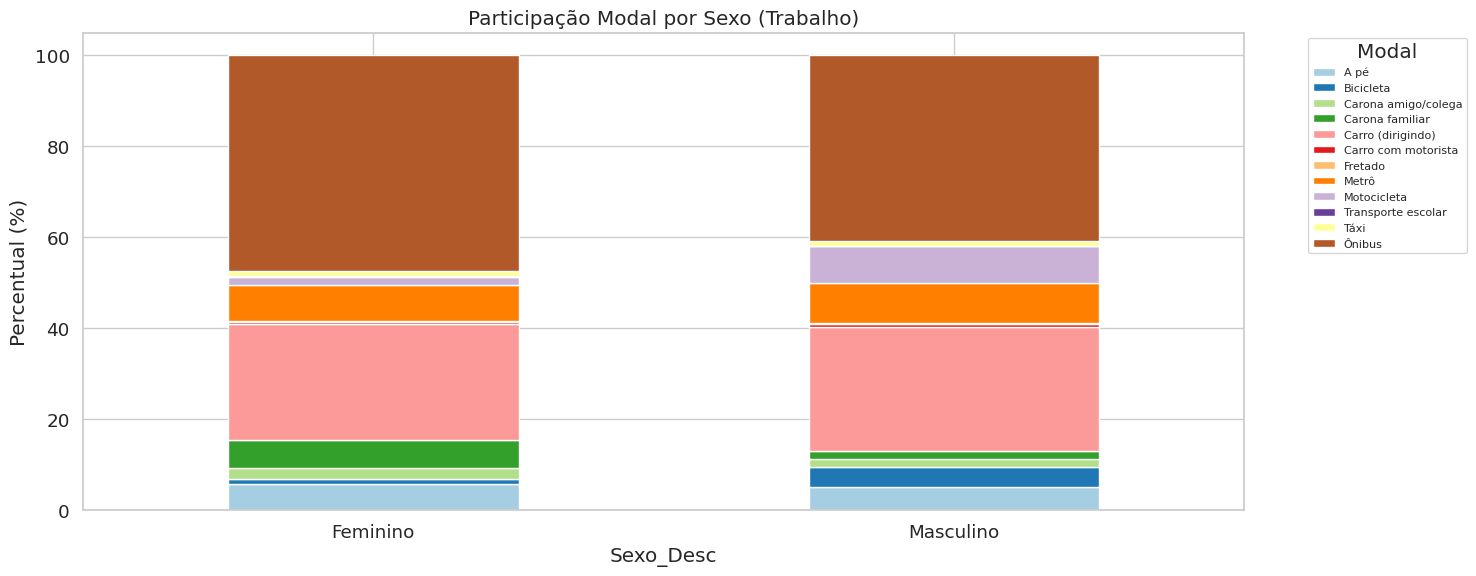

In [16]:
# CÓDIGO DA CÉLULA 4
# 1. Modal vs. Sexo
distribuicao_sexo = pd.crosstab(
    df_analise['Sexo_Desc'],
    df_analise['Modal_Nome'],
    normalize='index'
) * 100

print("📊 Distribuição Modal GRANULAR por Sexo (%):\n", distribuicao_sexo.round(1).head())

# 2. Modal vs. Faixa Etária (Focando em faixas ativas)
faixas_trabalho = df_analise[df_analise['Faixa_Etaria_Desc'].isin(['16 a 24 anos', '25 a 39 anos', '40 a 59 anos', 'Acima de 60 anos'])]

distribuicao_idade = pd.crosstab(
    faixas_trabalho['Faixa_Etaria_Desc'],
    faixas_trabalho['Modal_Nome'],
    normalize='index'
) * 100

print("\n📊 Distribuição Modal GRANULAR por Faixa Etária (%):\n", distribuicao_idade.round(1).head())

plt.figure(figsize=(15, 6))
distribuicao_sexo.plot(
    kind='bar',
    stacked=True,
    colormap='Paired',
    ax=plt.gca()
)
plt.title('Participação Modal por Sexo (Trabalho)')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# (Gráfico de Faixa Etária seria plotado aqui)

### Conclusões Analíticas: Demografia (Sexo e Idade)
#1.  **Diferença de Gênero:** **Mulheres** dependem mais do **Ônibus** e **Carona familiar**. **Homens** usam mais **Motocicleta** e **Carro (dirigindo)**.
#2.  **Faixa Etária:** Jovens (16-24) têm maior uso de modais ativos e **Metrô**. Idosos (Acima de 60) dependem mais de **Carona familiar** e **Carro com motorista**.

📈 Distribuição Modal GRANULAR por Renda (%):
 Modal_Nome      A pé  Bicicleta  Carona amigo/colega  Carona familiar  \
Renda_Ordenada                                                          
Até 1 SM         8.5        3.0                  1.2              2.1   
1 a 2 SM         4.8        2.7                  1.5              2.7   
2 a 3 SM         5.1        2.5                  2.6              4.7   
3 a 5 SM         4.8        2.8                  2.9              6.5   
5 a 10 SM        5.1        3.2                  3.0              5.4   

Modal_Nome      Carro (dirigindo)  Carro com motorista  Fretado  Metrô  \
Renda_Ordenada                                                           
Até 1 SM                      3.5                  0.2      0.2   10.9   
1 a 2 SM                      7.7                  0.3      0.1   11.7   
2 a 3 SM                     27.0                  0.3      0.2    7.2   
3 a 5 SM                     45.4                  0.4      0.2    6.8  

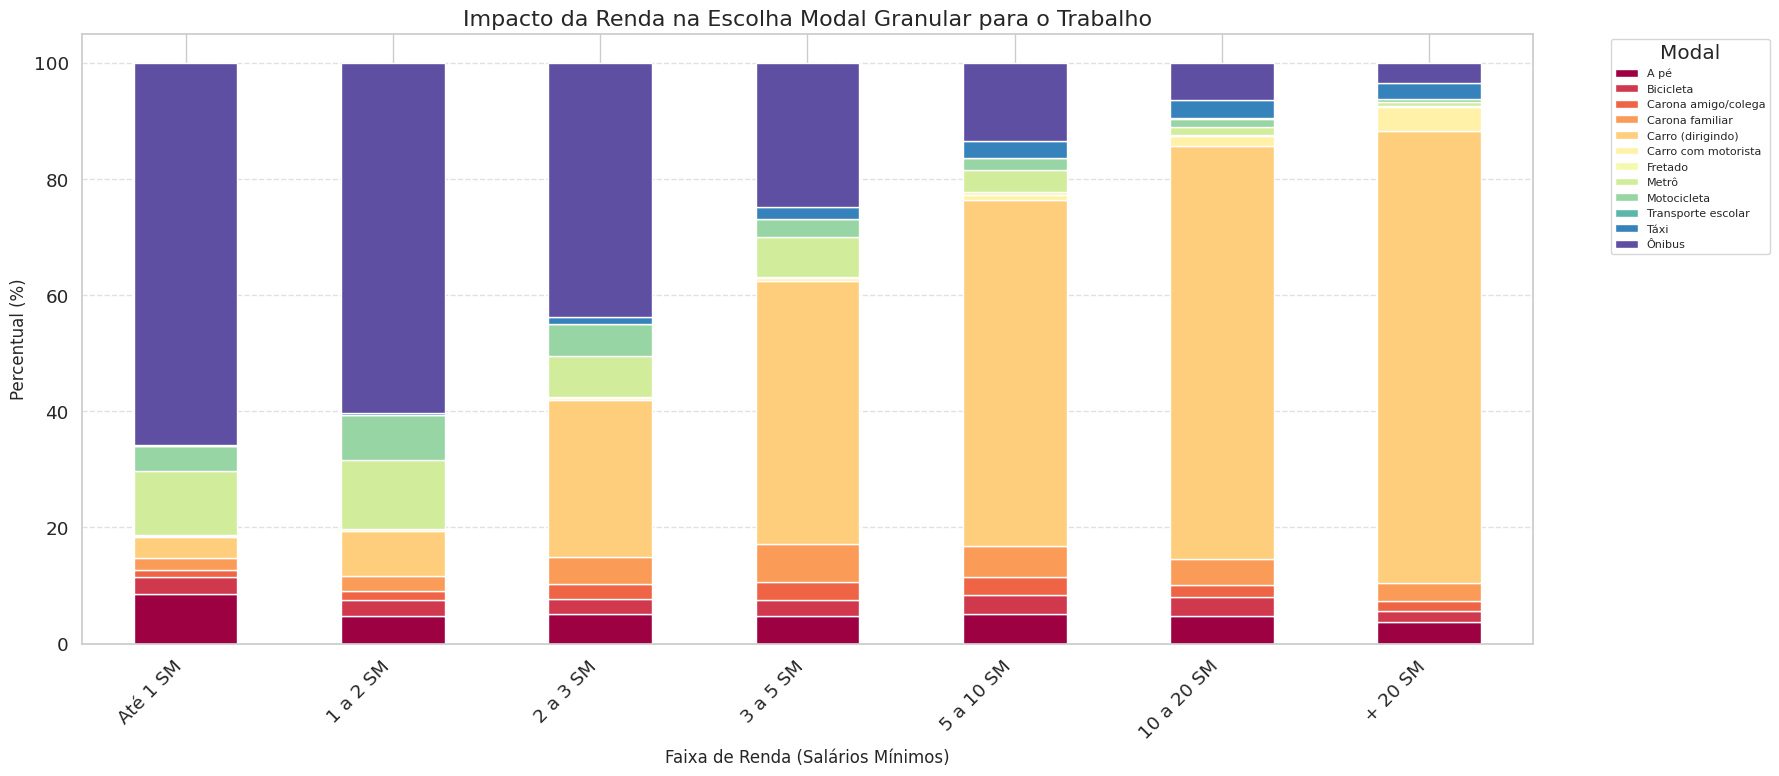

In [17]:
# CÓDIGO DA CÉLULA 5
# 1. Filtragem e Ordenação da Renda
faixas_renda_validas = df_analise[~df_analise['Renda_Desc'].isin(['Sem rendimento', 'Sem declaração'])].copy()

ordem_renda = ['Até 1 SM', '1 a 2 SM', '2 a 3 SM', '3 a 5 SM', '5 a 10 SM', '10 a 20 SM', '+ 20 SM']
faixas_renda_validas['Renda_Ordenada'] = pd.Categorical(
    faixas_renda_validas['Renda_Desc'],
    categories=ordem_renda,
    ordered=True
)

# 2. Tabela Cruzada
distribuicao_renda = pd.crosstab(
    faixas_renda_validas['Renda_Ordenada'],
    faixas_renda_validas['Modal_Nome'],
    normalize='index'
) * 100

print("📈 Distribuição Modal GRANULAR por Renda (%):\n", distribuicao_renda.round(1).head())

# 3. Plotar o Gráfico de Barras Empilhadas
plt.figure(figsize=(18, 8))
distribuicao_renda.plot(
    kind='bar',
    stacked=True,
    colormap='Spectral',
    ax=plt.gca()
)
plt.title('Impacto da Renda na Escolha Modal Granular para o Trabalho', fontsize=16)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xlabel('Faixa de Renda (Salários Mínimos)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Conclusões Analíticas: Renda (Análise Chave)
# 1.  **Ponto de Inflexão (Ônibus/Carro):** O **Ônibus** domina na base. O **Carro (dirigindo)** se torna o modal dominante (ou 2º) acima de 5 SM.
# 2.  **Modais Ativos/Necessidade:** A participação de **A pé** é significativamente maior na faixa "Até 1 SM" do que nas faixas de alta renda.

In [18]:
# CÓDIGO DA CÉLULA 6
import plotly.graph_objects as go

# --- 1. Preparação dos Dados para Sankey (Cidade -> Modal) ---
sankey_data = df_analise.groupby(['Cidade_Residencia_Clean', 'Modal_Nome']).size().reset_index(name='Count')

# 2. DEFINIR RÓTULOS (NODES) E CORES
cidades = sankey_data['Cidade_Residencia_Clean'].unique().tolist()
modais = sankey_data['Modal_Nome'].unique().tolist()
labels = cidades + modais

# Mapeamento de rótulo para índice
label_to_index = {label: i for i, label in enumerate(labels)}

# Definir cores dos nós
node_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#7f7f7f'] * 3

# --- 3. CRIAR LISTAS DE SOURCE, TARGET E VALUE ---
source = sankey_data['Cidade_Residencia_Clean'].map(label_to_index).tolist()
target = sankey_data['Modal_Nome'].map(label_to_index).tolist()
value = sankey_data['Count'].tolist()

# --- 4. CONSTRUÇÃO E EXIBIÇÃO ---
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15, thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels, color = node_colors
    ),
    link = dict(
      source = source, target = target, value = value,
      color='rgba(150, 150, 150, 0.2)'
  ))])

fig.update_layout(
    title_text="Fluxo de Mobilidade RMR: Cidade de Residência ➔ Modal Granular Escolhido (Trabalho)",
    font_size=10,
    height=750,
    template='plotly_dark'
)
fig.show()

### Conclusões Analíticas: Fluxo (Sankey)
# 1.  **Visualização do Domínio:** O Sankey mostra que a maior fatia de fluxo de **todas as cidades metropolitanas** se concentra no nó **Ônibus**.
# 2.  **Padrão Metropolitano:** Os fluxos que saem de **Olinda** e **Jaboatão** se dividem primariamente entre **Ônibus** e, em seguida, **Carro (dirigindo)** e **Motocicleta**, reforçando a dependência de modais rodoviários para a interligação metropolitana.

###📊 Por que utilizamos cada gráfico?

Durante a análise de integração multimodal, utilizamos diferentes tipos de gráficos porque cada visualização destaca um aspecto específico dos dados e facilita interpretações que seriam difíceis de perceber apenas com tabelas. A escolha foi guiada pela clareza, comparação entre grupos e compreensão da distribuição modal.

1. Gráfico de Barras Empilhadas Horizontais (Distribuição Modal por Cidade)

Esse tipo de gráfico permite visualizar, de forma clara e compacta, como cada cidade distribui seus modais de transporte.
A escolha do formato horizontal foi intencional:

facilita a leitura dos nomes das cidades;

permite comparar rapidamente a proporção relativa de cada modal dentro de cada localidade;

evidencia diferenças estruturais entre cidades, como maior dependência de ônibus ou carro.
Ele funciona muito bem quando queremos comparar muitos modais ao mesmo tempo, sem poluir visualmente.

2. Gráfico de Barras Empilhadas Verticais (Participação Modal por Sexo)

Esse gráfico foi escolhido porque destaca diferenças de comportamento entre grupos sociais, no caso, homens e mulheres.
O formato vertical ajuda a enfatizar:

a composição porcentual dos modais dentro de cada sexo;

contrastes diretos, como maior uso relativo de determinados meios por um dos grupos;

padrões sociais importantes para análise de mobilidade.
É uma visualização ideal para mostrar proporções internas e comparar perfis.

3. Diagrama de Sankey (Fluxo Cidade → Modal)

O Sankey foi escolhido para ilustrar um aspecto da mobilidade que nenhum outro gráfico mostra tão bem:
o fluxo entre origem (cidade) e destino modal.
Ele é perfeito para:

visualizar trajetórias entre categorias;

entender volumes de pessoas migrando de uma cidade para um modal específico;

perceber “caminhos preferenciais”, como certas cidades usando mais carro, ônibus ou metrô.
Apesar de visualmente mais complexo, ele revela relações profundas que ficam escondidas em gráficos convencionais.



# 📈 Análise com modelos de regressão


In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Carregar dados novamente para garantir consistência
df_regression = pd.read_csv('/content/dataset2.csv', sep=',', encoding='latin1')
df_regression.columns = df_regression.columns.str.strip()

# Criar variáveis numéricas para análise
# 1. Número de modais utilizados (complexidade do trajeto)
def contar_modais(valor):
    if pd.isna(valor):
        return 0
    valor = str(valor).replace(" ", "").split(",")
    return len([v for v in valor if v.isdigit() and int(v) > 0])

df_regression['num_modais_trabalho'] = df_regression['meio_transporte_trab'].apply(contar_modais)
df_regression['num_modais_aula'] = df_regression['transporte_aula'].apply(contar_modais)

# 2. Variável binária: usa integração
df_regression['usa_integracao'] = ((df_regression['utiliza_terminal_int_trabalho'] == 1) |
                                    (df_regression['utiliza_integracao_aula'] == 1)).astype(int)

# 3. Horário de saída (converter para minutos desde meia-noite)
def converter_horario(h):
    if pd.isna(h) or str(h) == '0:00:00':
        return np.nan
    try:
        parts = str(h).split(':')
        return int(parts[0]) * 60 + int(parts[1])
    except:
        return np.nan

df_regression['minutos_inicio_trabalho'] = df_regression['horario_inicio_trabalho'].apply(converter_horario)
df_regression['minutos_inicio_aula'] = df_regression['horario_inicio_aula'].apply(converter_horario)

# Filtrar apenas registros válidos para análise
df_reg_clean = df_regression[
    (df_regression['renda'].isin([1,2,3,4,5,6,7])) &  # Excluir sem renda e sem declaração
    (df_regression['faixa_etaria'].isin([3,4,5])) &   # Focar em faixas ativas (16-59 anos)
    (df_regression['num_modais_trabalho'] > 0)         # Apenas quem trabalha
].copy()

print("✅ Dados preparados para regressão")
print(f"Total de registros válidos: {len(df_reg_clean)}")
print(f"\nVariáveis criadas:")
print(f"  - num_modais_trabalho: quantidade de modais no trajeto ao trabalho")
print(f"  - usa_integracao: se utiliza integração (0 ou 1)")
print(f"  - minutos_inicio_trabalho: horário de entrada convertido em minutos")
print(f"\nResumo estatístico:")
print(df_reg_clean[['renda', 'faixa_etaria', 'num_modais_trabalho', 'usa_integracao']].describe())

✅ Dados preparados para regressão
Total de registros válidos: 39420

Variáveis criadas:
  - num_modais_trabalho: quantidade de modais no trajeto ao trabalho
  - usa_integracao: se utiliza integração (0 ou 1)
  - minutos_inicio_trabalho: horário de entrada convertido em minutos

Resumo estatístico:
              renda  faixa_etaria  num_modais_trabalho  usa_integracao
count  39420.000000  39420.000000         39420.000000    39420.000000
mean       2.925520      4.285185             1.291476        0.228082
std        1.545355      0.638649             0.611768        0.419601
min        1.000000      3.000000             1.000000        0.000000
25%        2.000000      4.000000             1.000000        0.000000
50%        2.000000      4.000000             1.000000        0.000000
75%        4.000000      5.000000             1.000000        0.000000
max        7.000000      5.000000             9.000000        1.000000


**📊 Regressão 1: Renda vs. Número de Modais Utilizados**

📈 REGRESSÃO LINEAR: Renda → Número de Modais

🔢 Equação do modelo:
   Nº Modais = 1.2690 + 0.0077 × Renda

📊 Métricas de desempenho:
   R² (coeficiente de determinação): 0.0004
   RMSE (erro médio quadrático):     0.6116

💡 Interpretação:
   • Para cada aumento de 1 faixa de renda, há um aumento médio
     de 0.0077 modais no trajeto ao trabalho.

   • O R² de 0.04% indica que a renda explica 0.04%
     da variação no número de modais utilizados.


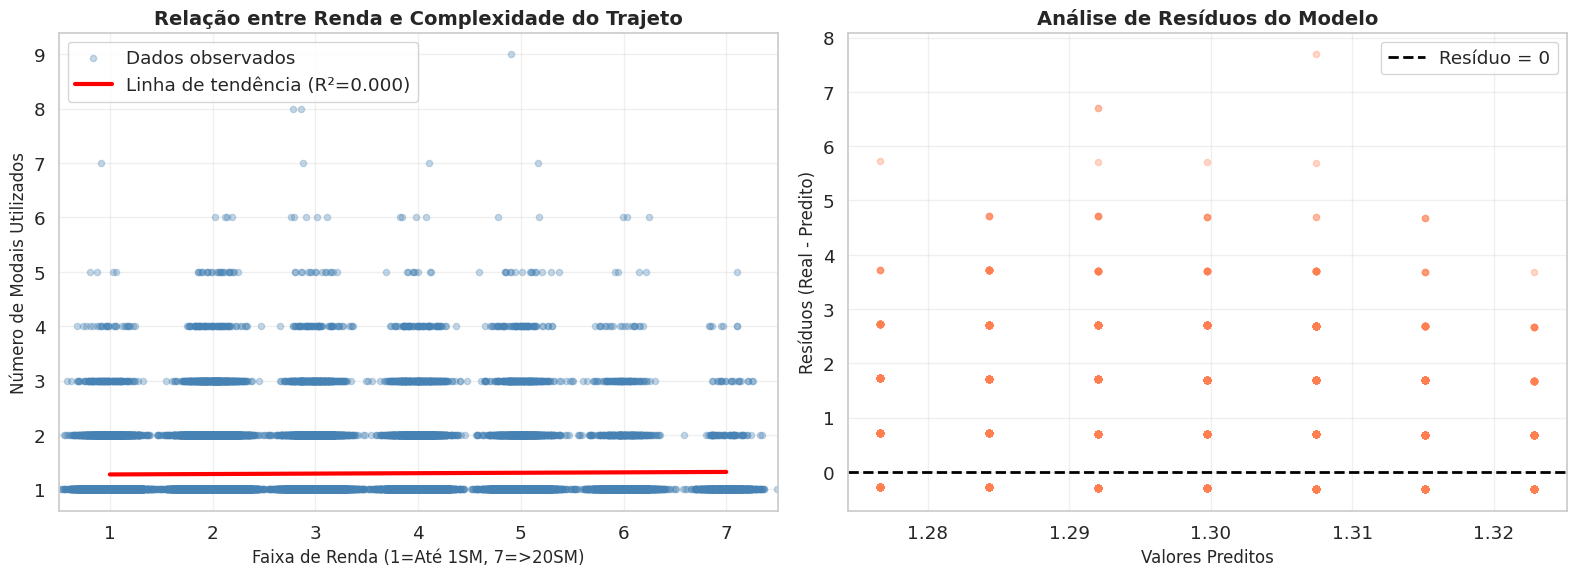


📉 Análise de Resíduos:
   Média dos resíduos: 0.000000
   Desvio padrão:      0.6116
   Resíduo mínimo:     -0.3228
   Resíduo máximo:     7.6926

   Se o modelo fosse perfeito, todos os resíduos estariam em zero.
   A dispersão observada indica que há outros fatores (além da renda)
   que influenciam o número de modais utilizados.


In [33]:
# Preparar dados
X_renda = df_reg_clean[['renda']].values
y_modais = df_reg_clean['num_modais_trabalho'].values

# Criar e treinar modelo de regressão linear
modelo_renda = LinearRegression()
modelo_renda.fit(X_renda, y_modais)

# Fazer predições
y_pred_renda = modelo_renda.predict(X_renda)

# Calcular métricas
r2_renda = r2_score(y_modais, y_pred_renda)
rmse_renda = np.sqrt(mean_squared_error(y_modais, y_pred_renda))
coef_renda = modelo_renda.coef_[0]
intercept_renda = modelo_renda.intercept_

# Calcular resíduos
residuos_renda = y_modais - y_pred_renda

print("=" * 70)
print("📈 REGRESSÃO LINEAR: Renda → Número de Modais")
print("=" * 70)
print(f"\n🔢 Equação do modelo:")
print(f"   Nº Modais = {intercept_renda:.4f} + {coef_renda:.4f} × Renda")
print(f"\n📊 Métricas de desempenho:")
print(f"   R² (coeficiente de determinação): {r2_renda:.4f}")
print(f"   RMSE (erro médio quadrático):     {rmse_renda:.4f}")
print(f"\n💡 Interpretação:")
if coef_renda < 0:
    print(f"   • Para cada aumento de 1 faixa de renda, há uma redução média")
    print(f"     de {abs(coef_renda):.4f} modais no trajeto ao trabalho.")
    print(f"   • Pessoas com maior renda tendem a usar MENOS modais,")
    print(f"     provavelmente por terem acesso a carro próprio.")
else:
    print(f"   • Para cada aumento de 1 faixa de renda, há um aumento médio")
    print(f"     de {coef_renda:.4f} modais no trajeto ao trabalho.")

print(f"\n   • O R² de {r2_renda:.2%} indica que a renda explica {r2_renda:.2%}")
print(f"     da variação no número de modais utilizados.")

# Visualização 1: Gráfico de Dispersão com Linha de Tendência
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Dispersão + Linha de Tendência COM JITTER para melhor visualização
np.random.seed(42)
x_jitter = X_renda.flatten() + np.random.normal(0, 0.15, size=len(X_renda))  # Adiciona variação horizontal
axes[0].scatter(x_jitter, y_modais, alpha=0.3, s=20, color='steelblue', label='Dados observados')

# Plotar linha de tendência LIMPA (sem jitter)
x_line = np.array([[1], [2], [3], [4], [5], [6], [7]])
y_line = modelo_renda.predict(x_line)
axes[0].plot(x_line, y_line, color='red', linewidth=3, label=f'Linha de tendência (R²={r2_renda:.3f})')

axes[0].set_xlabel('Faixa de Renda (1=Até 1SM, 7=>20SM)', fontsize=12)
axes[0].set_ylabel('Número de Modais Utilizados', fontsize=12)
axes[0].set_title('Relação entre Renda e Complexidade do Trajeto', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0.5, 7.5])  # Limita o eixo X para melhor visualização

# Subplot 2: Análise de Resíduos
axes[1].scatter(y_pred_renda, residuos_renda, alpha=0.3, s=20, color='coral')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=2, label='Resíduo = 0')
axes[1].set_xlabel('Valores Preditos', fontsize=12)
axes[1].set_ylabel('Resíduos (Real - Predito)', fontsize=12)
axes[1].set_title('Análise de Resíduos do Modelo', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📉 Análise de Resíduos:")
print(f"   Média dos resíduos: {residuos_renda.mean():.6f}")
print(f"   Desvio padrão:      {residuos_renda.std():.4f}")
print(f"   Resíduo mínimo:     {residuos_renda.min():.4f}")
print(f"   Resíduo máximo:     {residuos_renda.max():.4f}")
print("\n   Se o modelo fosse perfeito, todos os resíduos estariam em zero.")
print("   A dispersão observada indica que há outros fatores (além da renda)")
print("   que influenciam o número de modais utilizados.")


**📊 Regressão 2: Faixa Etária vs. Horário de Início do Trabalho**

⏰ REGRESSÃO LINEAR: Renda → Horário de Início do Trabalho

🔢 Equação do modelo:
   Horário (min) = 573.15 + -10.55 × Renda

📊 Métricas de desempenho:
   R² (coeficiente de determinação): 0.0062
   RMSE (erro em minutos):           206.02

💡 Interpretação:
   • Para cada aumento de 1 faixa de renda, o horário de entrada
     diminui em média 10.55 minutos.
   • Pessoas com MAIOR renda tendem a entrar MAIS CEDO no trabalho.

   • O R² de 0.62% indica que a renda explica 0.62%
     da variação nos horários de entrada.

   • Horário médio de entrada: 09:02

📊 Horário médio por faixa de renda:
   Renda 1: 09:22 (n=5458)
   Renda 2: 09:10 (n=14786)
   Renda 3: 09:05 (n=6073)
   Renda 4: 08:51 (n=4514)
   Renda 5: 08:41 (n=4297)
   Renda 6: 08:23 (n=2243)
   Renda 7: 08:24 (n=795)


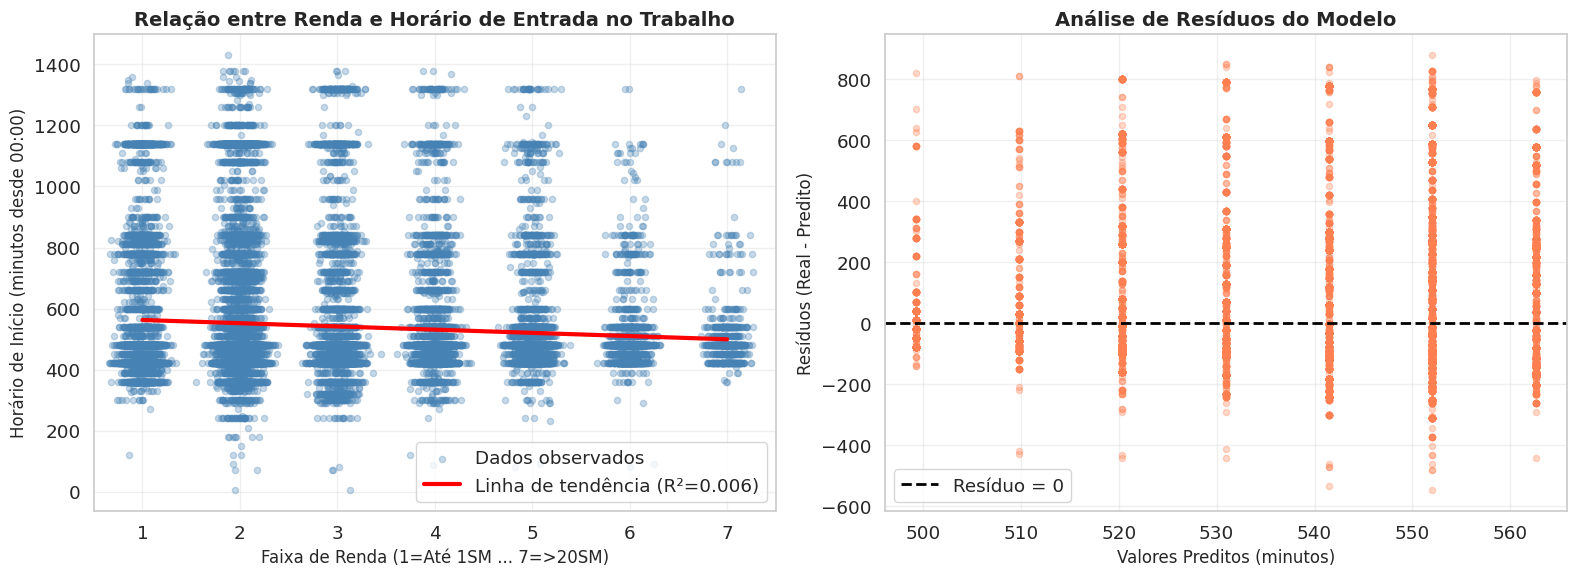


📉 Análise de Resíduos:
   Média dos resíduos: -0.000000
   Desvio padrão:      206.02 minutos
   Resíduo mínimo:     -545.04 minutos
   Resíduo máximo:     877.96 minutos

   ⚠️ Nota: R² baixo indica que horário de trabalho é mais influenciado
   por políticas da empresa e tipo de atividade do que pela renda.


In [32]:
# Filtrar apenas registros com horário válido
df_horario = df_reg_clean[df_reg_clean['minutos_inicio_trabalho'].notna()].copy()

# Preparar dados - AGORA usando RENDA (variável contínua com 7 níveis)
X_renda_horario = df_horario[['renda']].values
y_horario = df_horario['minutos_inicio_trabalho'].values

# Criar e treinar modelo
modelo_renda_horario = LinearRegression()
modelo_renda_horario.fit(X_renda_horario, y_horario)

# Fazer predições
y_pred_horario = modelo_renda_horario.predict(X_renda_horario)

# Calcular métricas
r2_horario = r2_score(y_horario, y_pred_horario)
rmse_horario = np.sqrt(mean_squared_error(y_horario, y_pred_horario))
coef_horario = modelo_renda_horario.coef_[0]
intercept_horario = modelo_renda_horario.intercept_

# Calcular resíduos
residuos_horario = y_horario - y_pred_horario

print("=" * 70)
print("⏰ REGRESSÃO LINEAR: Renda → Horário de Início do Trabalho")
print("=" * 70)
print(f"\n🔢 Equação do modelo:")
print(f"   Horário (min) = {intercept_horario:.2f} + {coef_horario:.2f} × Renda")
print(f"\n📊 Métricas de desempenho:")
print(f"   R² (coeficiente de determinação): {r2_horario:.4f}")
print(f"   RMSE (erro em minutos):           {rmse_horario:.2f}")
print(f"\n💡 Interpretação:")
if coef_horario > 0:
    print(f"   • Para cada aumento de 1 faixa de renda, o horário de entrada")
    print(f"     aumenta em média {coef_horario:.2f} minutos ({coef_horario/60:.2f} horas).")
    print(f"   • Pessoas com MAIOR renda tendem a entrar MAIS TARDE,")
    print(f"     possivelmente por terem maior flexibilidade de horário.")
else:
    print(f"   • Para cada aumento de 1 faixa de renda, o horário de entrada")
    print(f"     diminui em média {abs(coef_horario):.2f} minutos.")
    print(f"   • Pessoas com MAIOR renda tendem a entrar MAIS CEDO no trabalho.")

print(f"\n   • O R² de {r2_horario:.2%} indica que a renda explica {r2_horario:.2%}")
print(f"     da variação nos horários de entrada.")

# Converter minutos médios em horas legíveis
horario_medio = y_horario.mean()
hora_media = int(horario_medio // 60)
min_medio = int(horario_medio % 60)
print(f"\n   • Horário médio de entrada: {hora_media:02d}:{min_medio:02d}")

# Análise por faixa de renda
print(f"\n📊 Horário médio por faixa de renda:")
for faixa_renda in sorted(df_horario['renda'].unique()):
    dados_faixa = df_horario[df_horario['renda'] == faixa_renda]['minutos_inicio_trabalho']
    hora_faixa = int(dados_faixa.mean() // 60)
    min_faixa = int(dados_faixa.mean() % 60)
    print(f"   Renda {faixa_renda}: {hora_faixa:02d}:{min_faixa:02d} (n={len(dados_faixa)})")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Dispersão + Linha de Tendência com jitter para melhor visualização
np.random.seed(42)
x_jitter = X_renda_horario.flatten() + np.random.normal(0, 0.1, size=len(X_renda_horario))
axes[0].scatter(x_jitter, y_horario, alpha=0.3, s=20, color='steelblue', label='Dados observados')

# Plotar linha de tendência
x_line = np.array([[1], [2], [3], [4], [5], [6], [7]])
y_line = modelo_renda_horario.predict(x_line)
axes[0].plot(x_line, y_line, color='red', linewidth=3, label=f'Linha de tendência (R²={r2_horario:.3f})')

axes[0].set_xlabel('Faixa de Renda (1=Até 1SM ... 7=>20SM)', fontsize=12)
axes[0].set_ylabel('Horário de Início (minutos desde 00:00)', fontsize=12)
axes[0].set_title('Relação entre Renda e Horário de Entrada no Trabalho', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0.5, 7.5])

# Subplot 2: Análise de Resíduos
axes[1].scatter(y_pred_horario, residuos_horario, alpha=0.3, s=20, color='coral')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=2, label='Resíduo = 0')
axes[1].set_xlabel('Valores Preditos (minutos)', fontsize=12)
axes[1].set_ylabel('Resíduos (Real - Predito)', fontsize=12)
axes[1].set_title('Análise de Resíduos do Modelo', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📉 Análise de Resíduos:")
print(f"   Média dos resíduos: {residuos_horario.mean():.6f}")
print(f"   Desvio padrão:      {residuos_horario.std():.2f} minutos")
print(f"   Resíduo mínimo:     {residuos_horario.min():.2f} minutos")
print(f"   Resíduo máximo:     {residuos_horario.max():.2f} minutos")
print("\n   ⚠️ Nota: R² baixo indica que horário de trabalho é mais influenciado")
print("   por políticas da empresa e tipo de atividade do que pela renda.")

** 📊 Regressão 3: Modelo Múltiplo - Predição do Número de Modais**

🎯 REGRESSÃO LINEAR MÚLTIPLA: Predição do Número de Modais

🔢 Equação do modelo:
   Nº Modais = 1.4086
             + +0.0410 × Renda
             + -0.0732 × Faixa Etária
             + -0.0030 × Sexo
             + +0.3554 × Usa Integração

📊 Métricas de desempenho:
   R² (coeficiente de determinação): 0.0622
   RMSE (erro médio quadrático):     0.5924

💡 Interpretação dos coeficientes:

   • Renda (+0.0410):
     Cada aumento de renda adiciona 0.0410 modais.

   • Faixa Etária (-0.0732):
     Pessoas mais velhas tendem a usar MENOS modais.

   • Sexo (-0.0030):
     Mulheres (sexo=2) usam MENOS modais que homens (sexo=1).

   • Usa Integração (+0.3554):
     Quem usa integração tende a usar 0.3554 modais A MAIS,
     o que faz sentido (integração pressupõe multimodalidade).

   • R² de 6.22%: o modelo explica 6.22% da variação
     no número de modais. Comparado com o modelo simples (R²=0.04%),
     houve uma MELHORA de 6.18%.


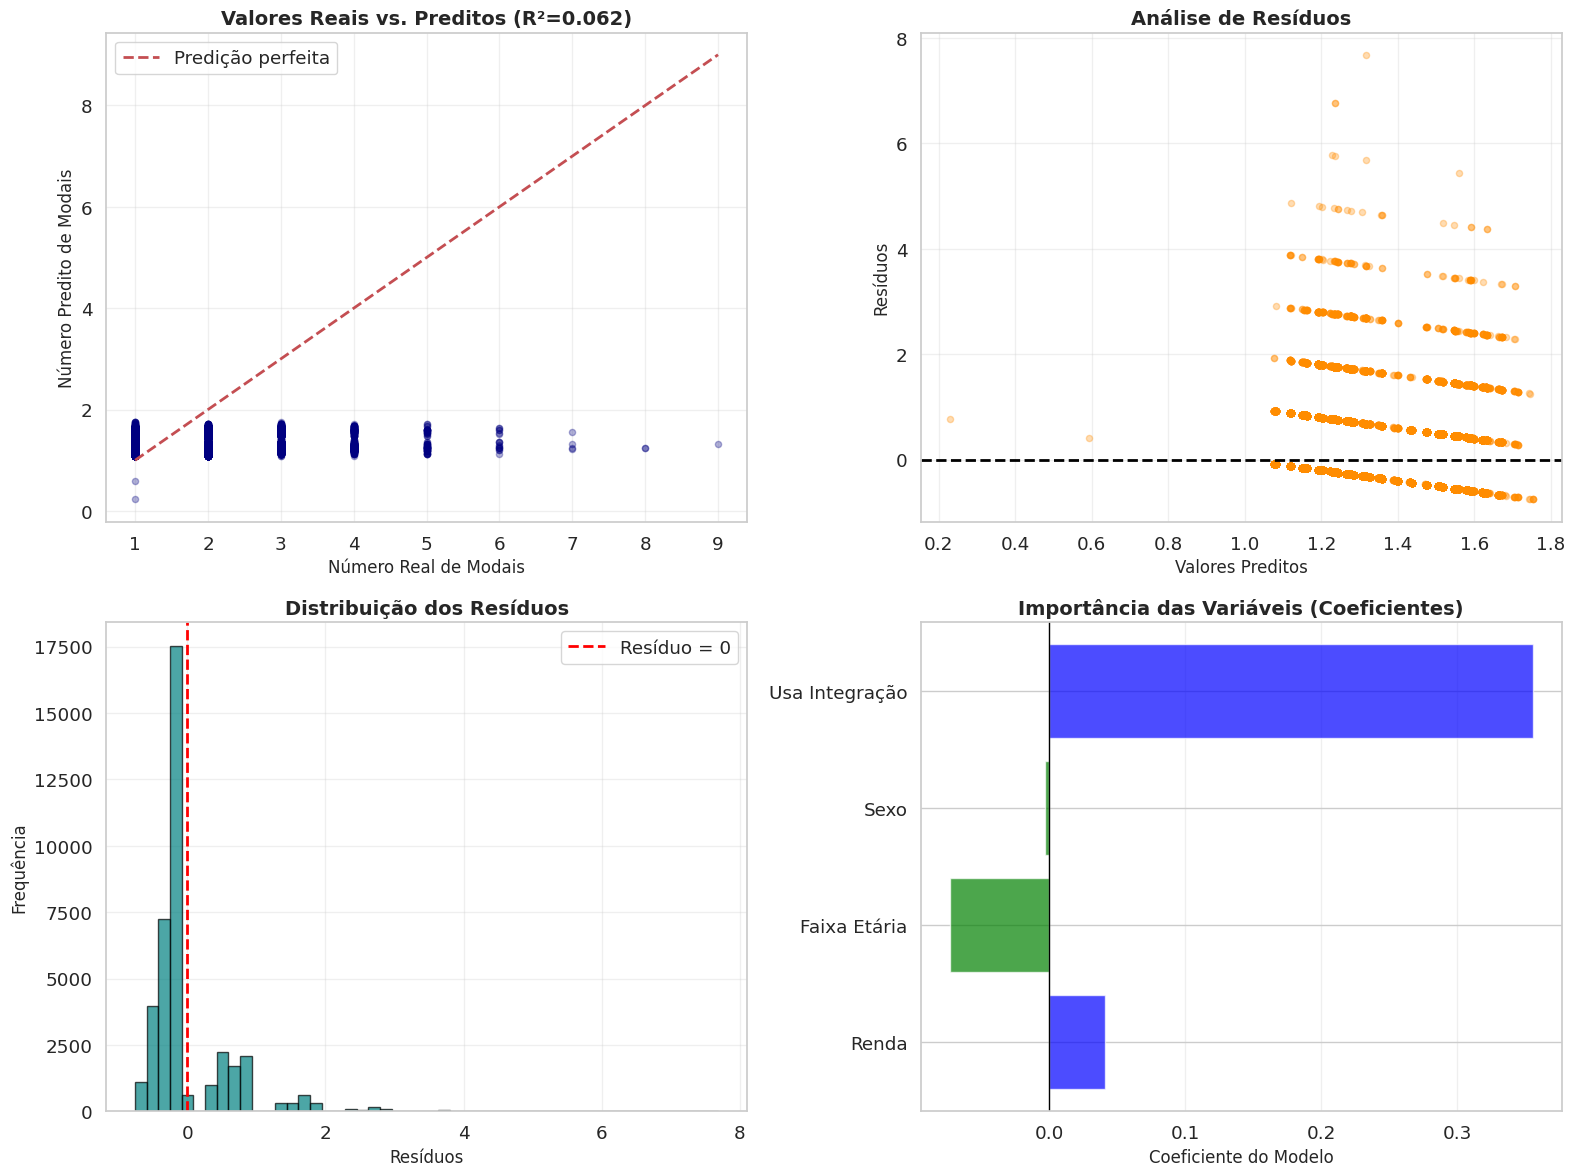


📉 Estatísticas dos Resíduos:
   Média:        0.000000
   Mediana:      -0.1948
   Desvio padrão: 0.5924
   Mínimo:       -0.7524
   Máximo:       7.6820


In [22]:
# Preparar dados com múltiplas variáveis
X_multiplo = df_reg_clean[['renda', 'faixa_etaria', 'sexo', 'usa_integracao']].values
y_multiplo = df_reg_clean['num_modais_trabalho'].values

# Criar e treinar modelo
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_multiplo, y_multiplo)

# Fazer predições
y_pred_multiplo = modelo_multiplo.predict(X_multiplo)

# Calcular métricas
r2_multiplo = r2_score(y_multiplo, y_pred_multiplo)
rmse_multiplo = np.sqrt(mean_squared_error(y_multiplo, y_pred_multiplo))
coefs_multiplo = modelo_multiplo.coef_
intercept_multiplo = modelo_multiplo.intercept_

# Calcular resíduos
residuos_multiplo = y_multiplo - y_pred_multiplo

print("=" * 80)
print("🎯 REGRESSÃO LINEAR MÚLTIPLA: Predição do Número de Modais")
print("=" * 80)
print(f"\n🔢 Equação do modelo:")
print(f"   Nº Modais = {intercept_multiplo:.4f}")
print(f"             + {coefs_multiplo[0]:+.4f} × Renda")
print(f"             + {coefs_multiplo[1]:+.4f} × Faixa Etária")
print(f"             + {coefs_multiplo[2]:+.4f} × Sexo")
print(f"             + {coefs_multiplo[3]:+.4f} × Usa Integração")

print(f"\n📊 Métricas de desempenho:")
print(f"   R² (coeficiente de determinação): {r2_multiplo:.4f}")
print(f"   RMSE (erro médio quadrático):     {rmse_multiplo:.4f}")

print(f"\n💡 Interpretação dos coeficientes:")
print(f"\n   • Renda ({coefs_multiplo[0]:+.4f}):")
if coefs_multiplo[0] < 0:
    print(f"     Cada aumento de renda reduz em {abs(coefs_multiplo[0]):.4f} modais,")
    print(f"     mantendo outras variáveis constantes.")
else:
    print(f"     Cada aumento de renda adiciona {coefs_multiplo[0]:.4f} modais.")

print(f"\n   • Faixa Etária ({coefs_multiplo[1]:+.4f}):")
if coefs_multiplo[1] < 0:
    print(f"     Pessoas mais velhas tendem a usar MENOS modais.")
else:
    print(f"     Pessoas mais velhas tendem a usar MAIS modais.")

print(f"\n   • Sexo ({coefs_multiplo[2]:+.4f}):")
if coefs_multiplo[2] < 0:
    print(f"     Mulheres (sexo=2) usam MENOS modais que homens (sexo=1).")
else:
    print(f"     Mulheres usam MAIS modais que homens.")

print(f"\n   • Usa Integração ({coefs_multiplo[3]:+.4f}):")
if coefs_multiplo[3] > 0:
    print(f"     Quem usa integração tende a usar {coefs_multiplo[3]:.4f} modais A MAIS,")
    print(f"     o que faz sentido (integração pressupõe multimodalidade).")

print(f"\n   • R² de {r2_multiplo:.2%}: o modelo explica {r2_multiplo:.2%} da variação")
print(f"     no número de modais. Comparado com o modelo simples (R²={r2_renda:.2%}),")
if r2_multiplo > r2_renda:
    print(f"     houve uma MELHORA de {(r2_multiplo - r2_renda):.2%}.")
else:
    print(f"     não houve melhora significativa.")

# Visualização
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Valores Reais vs. Preditos
axes[0, 0].scatter(y_multiplo, y_pred_multiplo, alpha=0.3, s=20, color='navy')
axes[0, 0].plot([y_multiplo.min(), y_multiplo.max()],
                 [y_multiplo.min(), y_multiplo.max()],
                 'r--', linewidth=2, label='Predição perfeita')
axes[0, 0].set_xlabel('Número Real de Modais', fontsize=12)
axes[0, 0].set_ylabel('Número Predito de Modais', fontsize=12)
axes[0, 0].set_title(f'Valores Reais vs. Preditos (R²={r2_multiplo:.3f})', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Análise de Resíduos
axes[0, 1].scatter(y_pred_multiplo, residuos_multiplo, alpha=0.3, s=20, color='darkorange')
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Valores Preditos', fontsize=12)
axes[0, 1].set_ylabel('Resíduos', fontsize=12)
axes[0, 1].set_title('Análise de Resíduos', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Subplot 3: Histograma dos Resíduos
axes[1, 0].hist(residuos_multiplo, bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Resíduo = 0')
axes[1, 0].set_xlabel('Resíduos', fontsize=12)
axes[1, 0].set_ylabel('Frequência', fontsize=12)
axes[1, 0].set_title('Distribuição dos Resíduos', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Subplot 4: Importância das Variáveis (Coeficientes)
variaveis = ['Renda', 'Faixa Etária', 'Sexo', 'Usa Integração']
colors = ['green' if c < 0 else 'blue' for c in coefs_multiplo]
axes[1, 1].barh(variaveis, coefs_multiplo, color=colors, alpha=0.7)
axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1, 1].set_xlabel('Coeficiente do Modelo', fontsize=12)
axes[1, 1].set_title('Importância das Variáveis (Coeficientes)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n📉 Estatísticas dos Resíduos:")
print(f"   Média:        {residuos_multiplo.mean():.6f}")
print(f"   Mediana:      {np.median(residuos_multiplo):.4f}")
print(f"   Desvio padrão: {residuos_multiplo.std():.4f}")
print(f"   Mínimo:       {residuos_multiplo.min():.4f}")
print(f"   Máximo:       {residuos_multiplo.max():.4f}")

# 🎯 Análise com classificadores

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
import seaborn as sns

# Carregar dados
df_class = pd.read_csv('/content/dataset2.csv', sep=',', encoding='latin1')
df_class.columns = df_class.columns.str.strip()

# Criar variável alvo: usa_integracao
df_class['usa_integracao'] = (
    (df_class['utiliza_terminal_int_trabalho'] == 1) |
    (df_class['utiliza_integracao_aula'] == 1)
).astype(int)

# Criar features numéricas
df_class['num_modais_trabalho'] = df_class['meio_transporte_trab'].apply(contar_modais)

# Filtrar dados válidos
df_class_clean = df_class[
    (df_class['renda'].isin([1,2,3,4,5,6,7])) &
    (df_class['faixa_etaria'].isin([3,4,5])) &
    (df_class['sexo'].isin([1,2])) &
    (df_class['num_modais_trabalho'] > 0)
].copy()

# Preparar features e target
features = ['renda', 'faixa_etaria', 'sexo', 'num_modais_trabalho']
X = df_class_clean[features].values
y = df_class_clean['usa_integracao'].values

# Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("=" * 70)
print("🎯 PREPARAÇÃO DOS DADOS PARA CLASSIFICAÇÃO")
print("=" * 70)
print(f"\n📊 Problema: Prever se uma pessoa usa integração multimodal")
print(f"\n📈 Distribuição da variável alvo:")
print(f"   Não usa integração (0): {(y == 0).sum():,} ({(y == 0).mean():.2%})")
print(f"   Usa integração (1):     {(y == 1).sum():,} ({(y == 1).mean():.2%})")

print(f"\n🔢 Features utilizadas:")
for i, feature in enumerate(features):
    print(f"   {i+1}. {feature}")

print(f"\n📦 Divisão dos dados:")
print(f"   Conjunto de treino: {len(X_train):,} amostras ({len(X_train)/len(X):.1%})")
print(f"   Conjunto de teste:  {len(X_test):,} amostras ({len(X_test)/len(X):.1%})")

print(f"\n✅ Dados preparados com sucesso!")

🎯 PREPARAÇÃO DOS DADOS PARA CLASSIFICAÇÃO

📊 Problema: Prever se uma pessoa usa integração multimodal

📈 Distribuição da variável alvo:
   Não usa integração (0): 30,427 (77.19%)
   Usa integração (1):     8,991 (22.81%)

🔢 Features utilizadas:
   1. renda
   2. faixa_etaria
   3. sexo
   4. num_modais_trabalho

📦 Divisão dos dados:
   Conjunto de treino: 27,592 amostras (70.0%)
   Conjunto de teste:  11,826 amostras (30.0%)

✅ Dados preparados com sucesso!


**🤖 Modelo 1: Regressão Logística**


📊 REGRESSÃO LOGÍSTICA - Resultados

🎯 Métricas de Desempenho:
   • Acurácia:  0.7812 (78.12%)
   • Precisão:  0.5945 (59.45%)
   • Recall:    0.1283 (12.83%)
   • F1-Score:  0.2110

💡 Interpretação:
   • Acurácia de 78.12%: o modelo acerta 78.12% das predições totais
   • Precisão de 59.45%: quando prevê 'usa integração', acerta 59.45% das vezes
   • Recall de 12.83%: consegue identificar 12.83% dos casos reais de integração
   • F1-Score: 0.2110 (média harmônica entre precisão e recall)


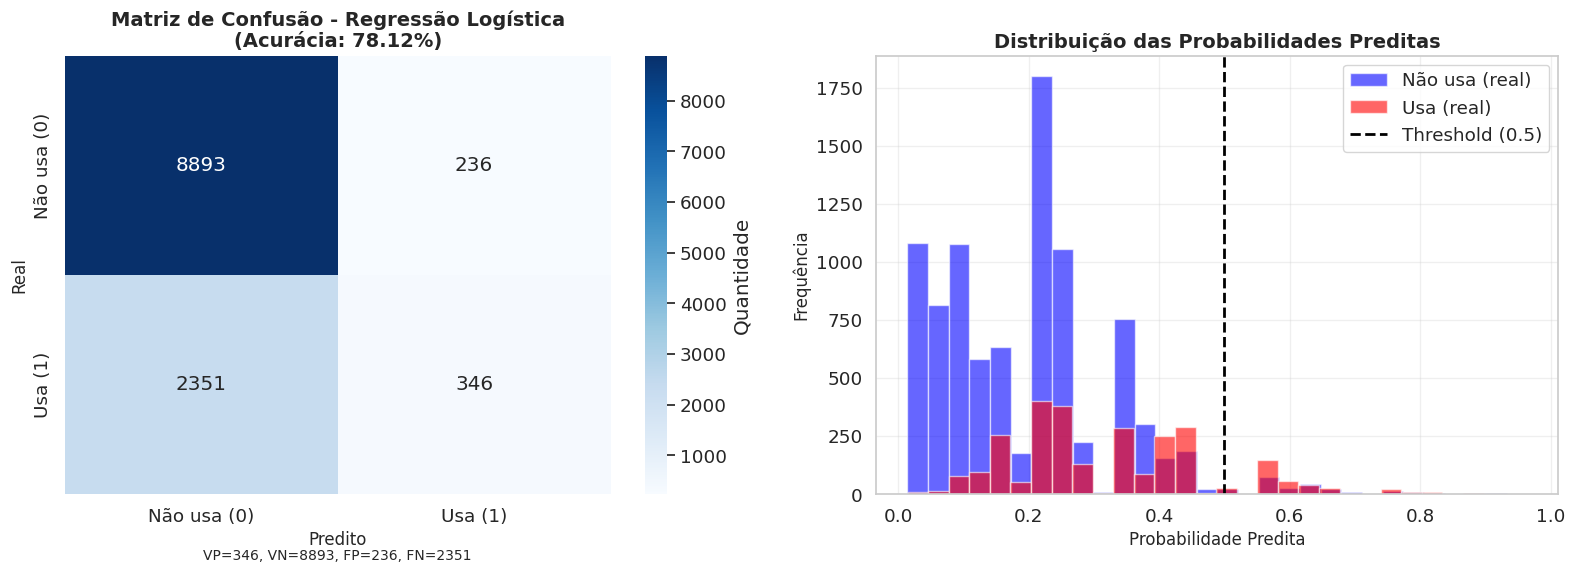


📋 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

 Não usa (0)       0.79      0.97      0.87      9129
     Usa (1)       0.59      0.13      0.21      2697

    accuracy                           0.78     11826
   macro avg       0.69      0.55      0.54     11826
weighted avg       0.75      0.78      0.72     11826



In [24]:
# Treinar modelo de Regressão Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Fazer predições
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

# Calcular métricas
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("=" * 70)
print("📊 REGRESSÃO LOGÍSTICA - Resultados")
print("=" * 70)
print(f"\n🎯 Métricas de Desempenho:")
print(f"   • Acurácia:  {acc_lr:.4f} ({acc_lr:.2%})")
print(f"   • Precisão:  {prec_lr:.4f} ({prec_lr:.2%})")
print(f"   • Recall:    {rec_lr:.4f} ({rec_lr:.2%})")
print(f"   • F1-Score:  {f1_lr:.4f}")

print(f"\n💡 Interpretação:")
print(f"   • Acurácia de {acc_lr:.2%}: o modelo acerta {acc_lr:.2%} das predições totais")
print(f"   • Precisão de {prec_lr:.2%}: quando prevê 'usa integração', acerta {prec_lr:.2%} das vezes")
print(f"   • Recall de {rec_lr:.2%}: consegue identificar {rec_lr:.2%} dos casos reais de integração")
print(f"   • F1-Score: {f1_lr:.4f} (média harmônica entre precisão e recall)")

# Visualizar Matriz de Confusão
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Matriz de Confusão
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não usa (0)', 'Usa (1)'],
            yticklabels=['Não usa (0)', 'Usa (1)'],
            ax=axes[0], cbar_kws={'label': 'Quantidade'})
axes[0].set_xlabel('Predito', fontsize=12)
axes[0].set_ylabel('Real', fontsize=12)
axes[0].set_title(f'Matriz de Confusão - Regressão Logística\n(Acurácia: {acc_lr:.2%})',
                   fontsize=14, fontweight='bold')

# Adicionar texto explicativo na matriz
axes[0].text(0.5, -0.15,
             f'VP={cm_lr[1,1]}, VN={cm_lr[0,0]}, FP={cm_lr[0,1]}, FN={cm_lr[1,0]}',
             ha='center', transform=axes[0].transAxes, fontsize=10)

# Subplot 2: Distribuição das Probabilidades Preditas
axes[1].hist(y_proba_lr[y_test == 0], bins=30, alpha=0.6, label='Não usa (real)', color='blue')
axes[1].hist(y_proba_lr[y_test == 1], bins=30, alpha=0.6, label='Usa (real)', color='red')
axes[1].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold (0.5)')
axes[1].set_xlabel('Probabilidade Predita', fontsize=12)
axes[1].set_ylabel('Frequência', fontsize=12)
axes[1].set_title('Distribuição das Probabilidades Preditas', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📋 Relatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred_lr,
                            target_names=['Não usa (0)', 'Usa (1)']))

**🌲 Modelo 2: Decision Tree (Árvore de Decisão)**


🌲 DECISION TREE - Resultados

🎯 Métricas de Desempenho:
   • Acurácia:  0.8002 (80.02%)
   • Precisão:  0.6265 (62.65%)
   • Recall:    0.3066 (30.66%)
   • F1-Score:  0.4118

🔍 Comparação com Regressão Logística:
   Acurácia:  0.8002 vs 0.7812 (Δ = +0.0189)
   Precisão:  0.6265 vs 0.5945 (Δ = +0.0320)
   Recall:    0.3066 vs 0.1283 (Δ = +0.1783)
   F1-Score:  0.4118 vs 0.2110 (Δ = +0.2007)


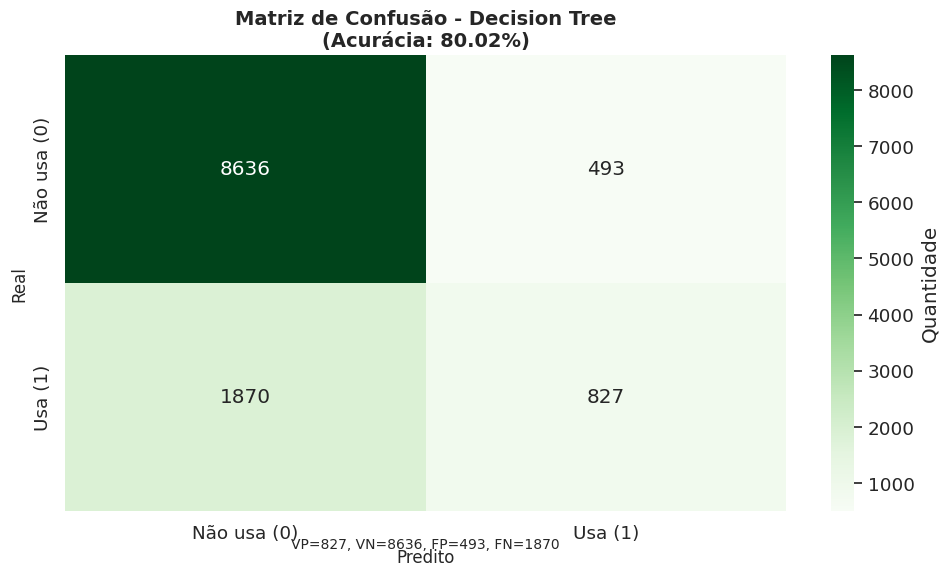


📊 Importância das Features (Decision Tree):
   1. renda                    : 0.5218 (52.18%)
   2. faixa_etaria             : 0.0075 (0.75%)
   3. sexo                     : 0.0066 (0.66%)
   4. num_modais_trabalho      : 0.4641 (46.41%)


In [25]:
# Treinar Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Fazer predições
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calcular métricas
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Matriz de confusão
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("=" * 70)
print("🌲 DECISION TREE - Resultados")
print("=" * 70)
print(f"\n🎯 Métricas de Desempenho:")
print(f"   • Acurácia:  {acc_dt:.4f} ({acc_dt:.2%})")
print(f"   • Precisão:  {prec_dt:.4f} ({prec_dt:.2%})")
print(f"   • Recall:    {rec_dt:.4f} ({rec_dt:.2%})")
print(f"   • F1-Score:  {f1_dt:.4f}")

print(f"\n🔍 Comparação com Regressão Logística:")
print(f"   Acurácia:  {acc_dt:.4f} vs {acc_lr:.4f} (Δ = {acc_dt - acc_lr:+.4f})")
print(f"   Precisão:  {prec_dt:.4f} vs {prec_lr:.4f} (Δ = {prec_dt - prec_lr:+.4f})")
print(f"   Recall:    {rec_dt:.4f} vs {rec_lr:.4f} (Δ = {rec_dt - rec_lr:+.4f})")
print(f"   F1-Score:  {f1_dt:.4f} vs {f1_lr:.4f} (Δ = {f1_dt - f1_lr:+.4f})")

# Visualização
plt.figure(figsize=(10, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não usa (0)', 'Usa (1)'],
            yticklabels=['Não usa (0)', 'Usa (1)'],
            cbar_kws={'label': 'Quantidade'})
plt.xlabel('Predito', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title(f'Matriz de Confusão - Decision Tree\n(Acurácia: {acc_dt:.2%})',
          fontsize=14, fontweight='bold')
plt.text(0.5, -0.08,
         f'VP={cm_dt[1,1]}, VN={cm_dt[0,0]}, FP={cm_dt[0,1]}, FN={cm_dt[1,0]}',
         ha='center', transform=plt.gca().transAxes, fontsize=10)
plt.tight_layout()
plt.show()

# Importância das features
importances_dt = dt_model.feature_importances_
print("\n📊 Importância das Features (Decision Tree):")
for i, (feature, importance) in enumerate(zip(features, importances_dt)):
    print(f"   {i+1}. {feature:25s}: {importance:.4f} ({importance*100:.2f}%)")

🌳 **Modelo 3: Random Forest**


🌳 RANDOM FOREST - Resultados

🎯 Métricas de Desempenho:
   • Acurácia:  0.7992 (79.92%)
   • Precisão:  0.6150 (61.50%)
   • Recall:    0.3192 (31.92%)
   • F1-Score:  0.4203

🔍 Comparação entre os 3 modelos:
   Métrica         Log. Reg.    Dec. Tree    Random Forest  
   ------------------------------------------------------------
   Acurácia        0.7812       0.8002       0.7992         
   Precisão        0.5945       0.6265       0.6150         
   Recall          0.1283       0.3066       0.3192         
   F1-Score        0.2110       0.4118       0.4203         


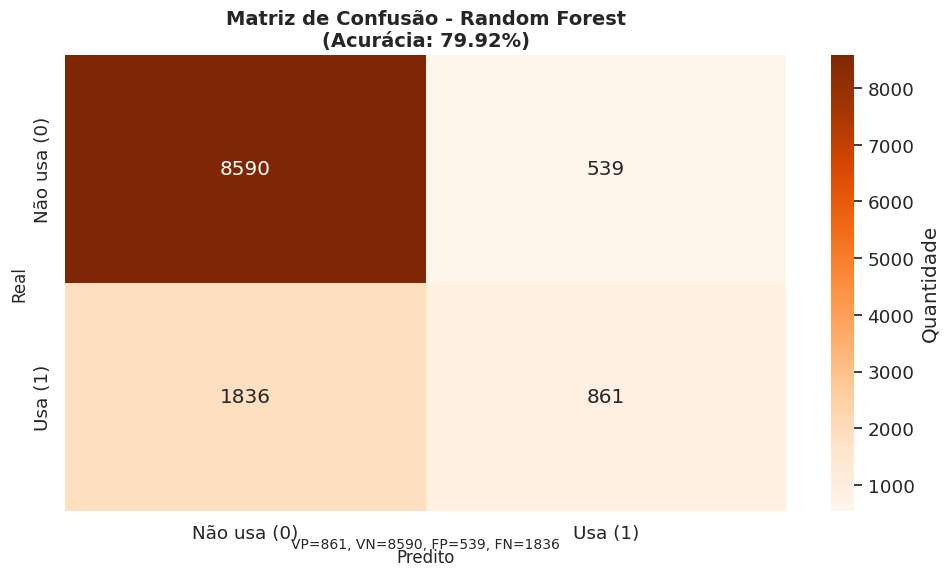


📊 Importância das Features (Random Forest):
   1. renda                    : 0.4776 (47.76%)
   2. faixa_etaria             : 0.0395 (3.95%)
   3. sexo                     : 0.0285 (2.85%)
   4. num_modais_trabalho      : 0.4544 (45.44%)


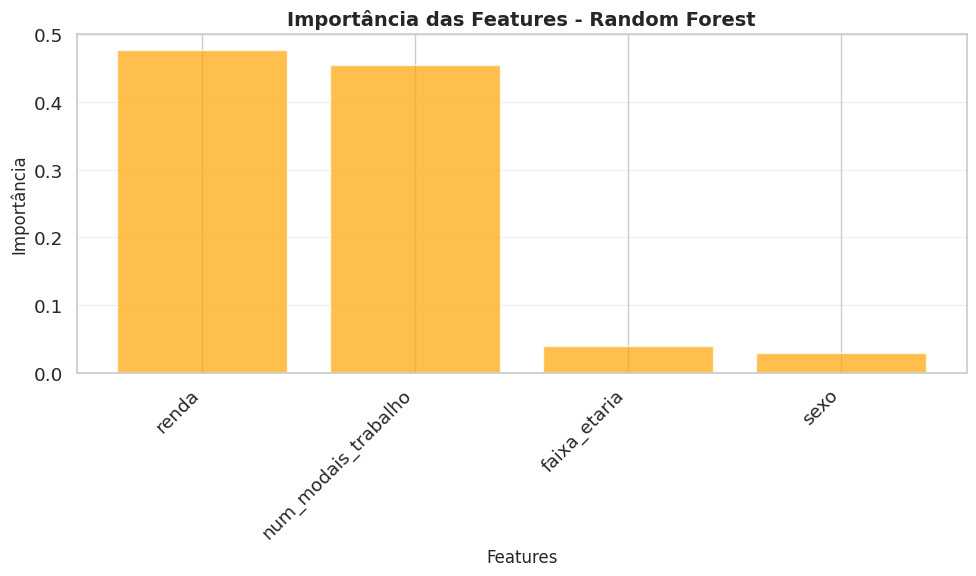

In [26]:
# Treinar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Fazer predições
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcular métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("=" * 70)
print("🌳 RANDOM FOREST - Resultados")
print("=" * 70)
print(f"\n🎯 Métricas de Desempenho:")
print(f"   • Acurácia:  {acc_rf:.4f} ({acc_rf:.2%})")
print(f"   • Precisão:  {prec_rf:.4f} ({prec_rf:.2%})")
print(f"   • Recall:    {rec_rf:.4f} ({rec_rf:.2%})")
print(f"   • F1-Score:  {f1_rf:.4f}")

print(f"\n🔍 Comparação entre os 3 modelos:")
print(f"   {'Métrica':<15} {'Log. Reg.':<12} {'Dec. Tree':<12} {'Random Forest':<15}")
print(f"   {'-'*60}")
print(f"   {'Acurácia':<15} {acc_lr:<12.4f} {acc_dt:<12.4f} {acc_rf:<15.4f}")
print(f"   {'Precisão':<15} {prec_lr:<12.4f} {prec_dt:<12.4f} {prec_rf:<15.4f}")
print(f"   {'Recall':<15} {rec_lr:<12.4f} {rec_dt:<12.4f} {rec_rf:<15.4f}")
print(f"   {'F1-Score':<15} {f1_lr:<12.4f} {f1_dt:<12.4f} {f1_rf:<15.4f}")

# Visualização
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Não usa (0)', 'Usa (1)'],
            yticklabels=['Não usa (0)', 'Usa (1)'],
            cbar_kws={'label': 'Quantidade'})
plt.xlabel('Predito', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title(f'Matriz de Confusão - Random Forest\n(Acurácia: {acc_rf:.2%})',
          fontsize=14, fontweight='bold')
plt.text(0.5, -0.08,
         f'VP={cm_rf[1,1]}, VN={cm_rf[0,0]}, FP={cm_rf[0,1]}, FN={cm_rf[1,0]}',
         ha='center', transform=plt.gca().transAxes, fontsize=10)
plt.tight_layout()
plt.show()

# Importância das features
importances_rf = rf_model.feature_importances_
print("\n📊 Importância das Features (Random Forest):")
for i, (feature, importance) in enumerate(zip(features, importances_rf)):
    print(f"   {i+1}. {feature:25s}: {importance:.4f} ({importance*100:.2f}%)")

# Gráfico de importância
plt.figure(figsize=(10, 6))
indices = np.argsort(importances_rf)[::-1]
plt.bar(range(len(importances_rf)), importances_rf[indices], color='orange', alpha=0.7)
plt.xticks(range(len(importances_rf)), [features[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importância', fontsize=12)
plt.title('Importância das Features - Random Forest', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 📈 Curvas ROC (Receiver Operating Characteristic)

📊 ANÁLISE DE CURVAS ROC

🎯 AUC (Area Under the Curve) - Quanto maior, melhor:
   • Regressão Logística: 0.7356
   • Decision Tree:       0.7464
   • Random Forest:       0.7610

💡 Interpretação do AUC:
   • AUC = 1.0: Classificador perfeito
   • AUC = 0.5: Classificador aleatório (linha diagonal)
   • AUC > 0.7: Bom desempenho
   • AUC > 0.8: Ótimo desempenho


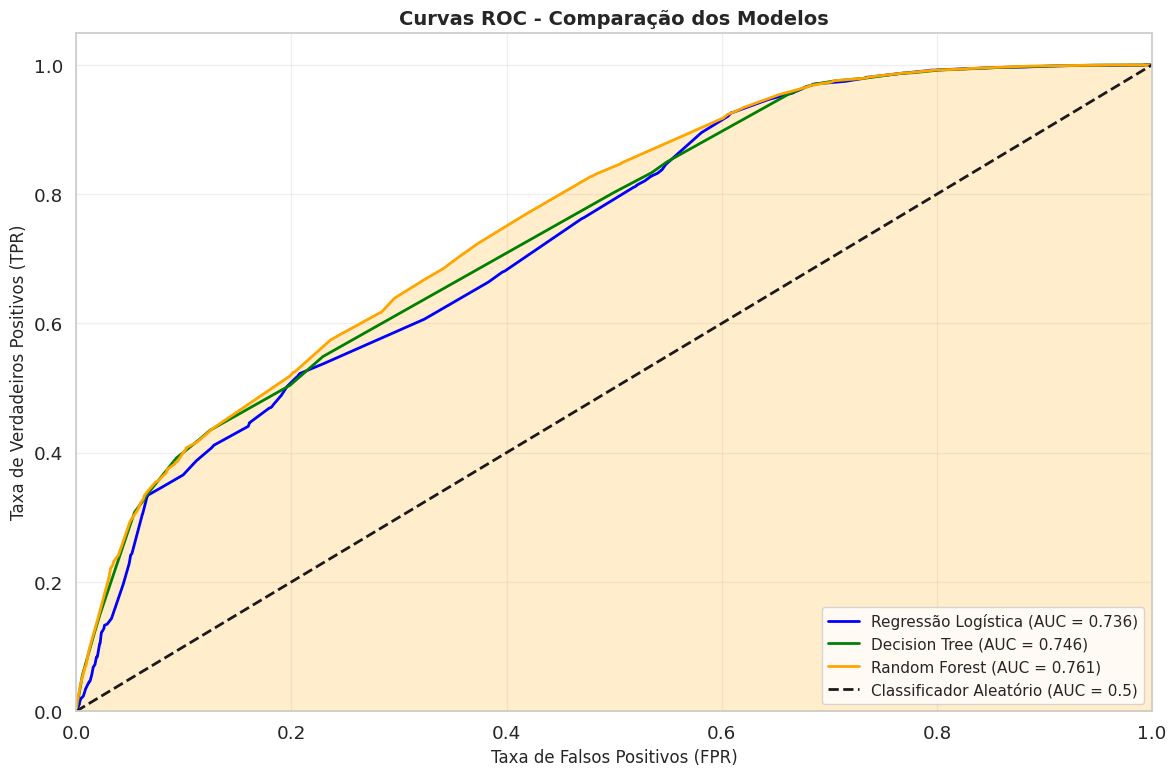


📊 Qual modelo teve melhor AUC?
   ✅ Random Forest com AUC = 0.7610


In [27]:
# Calcular curvas ROC para cada modelo
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Calcular AUC (Area Under Curve)
auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

print("=" * 70)
print("📊 ANÁLISE DE CURVAS ROC")
print("=" * 70)
print(f"\n🎯 AUC (Area Under the Curve) - Quanto maior, melhor:")
print(f"   • Regressão Logística: {auc_lr:.4f}")
print(f"   • Decision Tree:       {auc_dt:.4f}")
print(f"   • Random Forest:       {auc_rf:.4f}")

print(f"\n💡 Interpretação do AUC:")
print(f"   • AUC = 1.0: Classificador perfeito")
print(f"   • AUC = 0.5: Classificador aleatório (linha diagonal)")
print(f"   • AUC > 0.7: Bom desempenho")
print(f"   • AUC > 0.8: Ótimo desempenho")

# Plotar curvas ROC
plt.figure(figsize=(12, 8))

plt.plot(fpr_lr, tpr_lr, linewidth=2, label=f'Regressão Logística (AUC = {auc_lr:.3f})', color='blue')
plt.plot(fpr_dt, tpr_dt, linewidth=2, label=f'Decision Tree (AUC = {auc_dt:.3f})', color='green')
plt.plot(fpr_rf, tpr_rf, linewidth=2, label=f'Random Forest (AUC = {auc_rf:.3f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Classificador Aleatório (AUC = 0.5)')

plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparação dos Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Adicionar área sombreada para o melhor modelo
if auc_rf >= auc_lr and auc_rf >= auc_dt:
    plt.fill_between(fpr_rf, tpr_rf, alpha=0.2, color='orange')
elif auc_lr >= auc_dt:
    plt.fill_between(fpr_lr, tpr_lr, alpha=0.2, color='blue')
else:
    plt.fill_between(fpr_dt, tpr_dt, alpha=0.2, color='green')

plt.tight_layout()
plt.show()

print(f"\n📊 Qual modelo teve melhor AUC?")
best_auc = max(auc_lr, auc_dt, auc_rf)
if best_auc == auc_lr:
    print(f"   ✅ Regressão Logística com AUC = {auc_lr:.4f}")
elif best_auc == auc_dt:
    print(f"   ✅ Decision Tree com AUC = {auc_dt:.4f}")
else:
    print(f"   ✅ Random Forest com AUC = {auc_rf:.4f}")

# 📉 Curvas Precision-Recall

📊 ANÁLISE DE CURVAS PRECISION-RECALL

🎯 Average Precision (AP) - Quanto maior, melhor:
   • Regressão Logística: 0.4345
   • Decision Tree:       0.4636
   • Random Forest:       0.4871

💡 Interpretação:
   Average Precision resume a curva em um único número.
   É especialmente útil para datasets desbalanceados.
   Quanto mais próximo de 1.0, melhor o modelo.


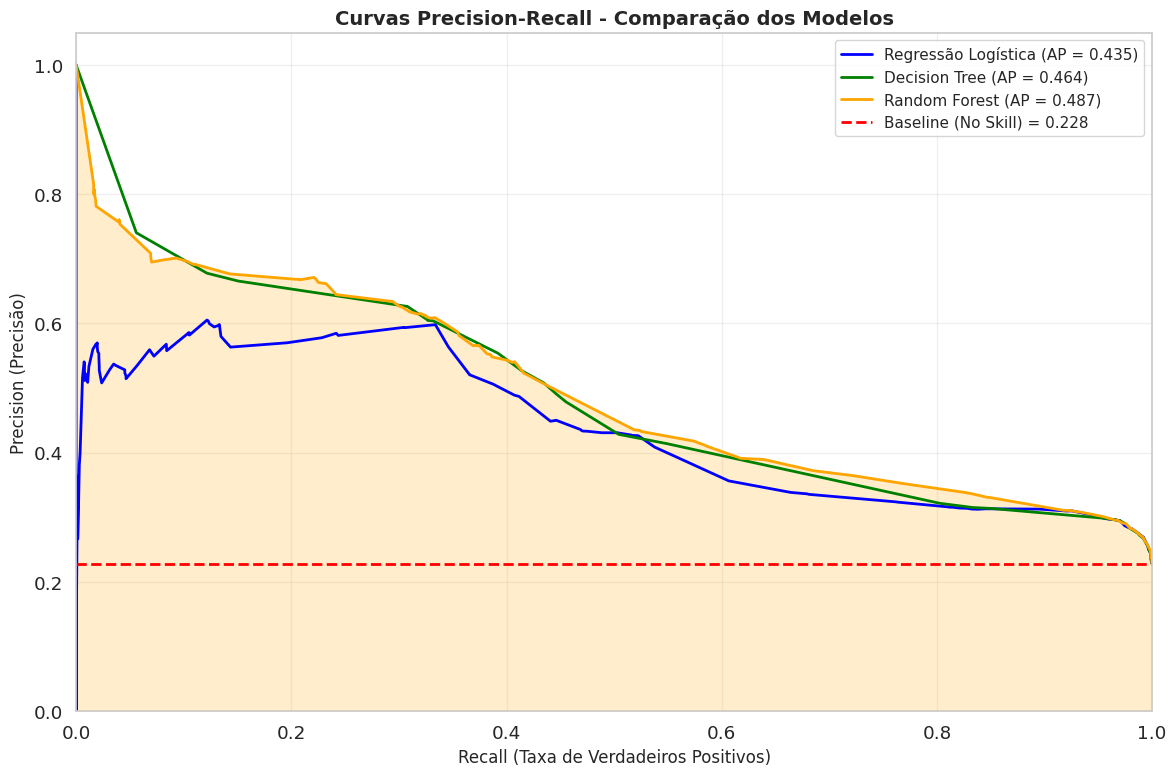


📊 Qual modelo teve melhor Average Precision?
   ✅ Random Forest com AP = 0.4871

   Todos os modelos superam o baseline de 0.2281? 
   ✅ SIM! Todos os modelos são melhores que classificação aleatória.


In [28]:
# Calcular curvas Precision-Recall
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_proba_dt)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)

# Calcular Average Precision Score
ap_lr = average_precision_score(y_test, y_proba_lr)
ap_dt = average_precision_score(y_test, y_proba_dt)
ap_rf = average_precision_score(y_test, y_proba_rf)

print("=" * 70)
print("📊 ANÁLISE DE CURVAS PRECISION-RECALL")
print("=" * 70)
print(f"\n🎯 Average Precision (AP) - Quanto maior, melhor:")
print(f"   • Regressão Logística: {ap_lr:.4f}")
print(f"   • Decision Tree:       {ap_dt:.4f}")
print(f"   • Random Forest:       {ap_rf:.4f}")

print(f"\n💡 Interpretação:")
print(f"   Average Precision resume a curva em um único número.")
print(f"   É especialmente útil para datasets desbalanceados.")
print(f"   Quanto mais próximo de 1.0, melhor o modelo.")

# Calcular baseline (proporção da classe positiva)
baseline = y_test.sum() / len(y_test)

# Plotar curvas Precision-Recall
plt.figure(figsize=(12, 8))

plt.plot(recall_lr, precision_lr, linewidth=2,
         label=f'Regressão Logística (AP = {ap_lr:.3f})', color='blue')
plt.plot(recall_dt, precision_dt, linewidth=2,
         label=f'Decision Tree (AP = {ap_dt:.3f})', color='green')
plt.plot(recall_rf, precision_rf, linewidth=2,
         label=f'Random Forest (AP = {ap_rf:.3f})', color='orange')
plt.axhline(y=baseline, color='red', linestyle='--', linewidth=2,
            label=f'Baseline (No Skill) = {baseline:.3f}')

plt.xlabel('Recall (Taxa de Verdadeiros Positivos)', fontsize=12)
plt.ylabel('Precision (Precisão)', fontsize=12)
plt.title('Curvas Precision-Recall - Comparação dos Modelos', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Adicionar área sombreada para o melhor modelo
if ap_rf >= ap_lr and ap_rf >= ap_dt:
    plt.fill_between(recall_rf, precision_rf, alpha=0.2, color='orange')
elif ap_lr >= ap_dt:
    plt.fill_between(recall_lr, precision_lr, alpha=0.2, color='blue')
else:
    plt.fill_between(recall_dt, precision_dt, alpha=0.2, color='green')

plt.tight_layout()
plt.show()

print(f"\n📊 Qual modelo teve melhor Average Precision?")
best_ap = max(ap_lr, ap_dt, ap_rf)
if best_ap == ap_lr:
    print(f"   ✅ Regressão Logística com AP = {ap_lr:.4f}")
elif best_ap == ap_dt:
    print(f"   ✅ Decision Tree com AP = {ap_dt:.4f}")
else:
    print(f"   ✅ Random Forest com AP = {ap_rf:.4f}")

print(f"\n   Todos os modelos superam o baseline de {baseline:.4f}? ")
if min(ap_lr, ap_dt, ap_rf) > baseline:
    print(f"   ✅ SIM! Todos os modelos são melhores que classificação aleatória.")
else:
    print(f"   ⚠️ Alguns modelos não superam significativamente o baseline.")

# 📊 Comparação Visual Completa dos Modelos

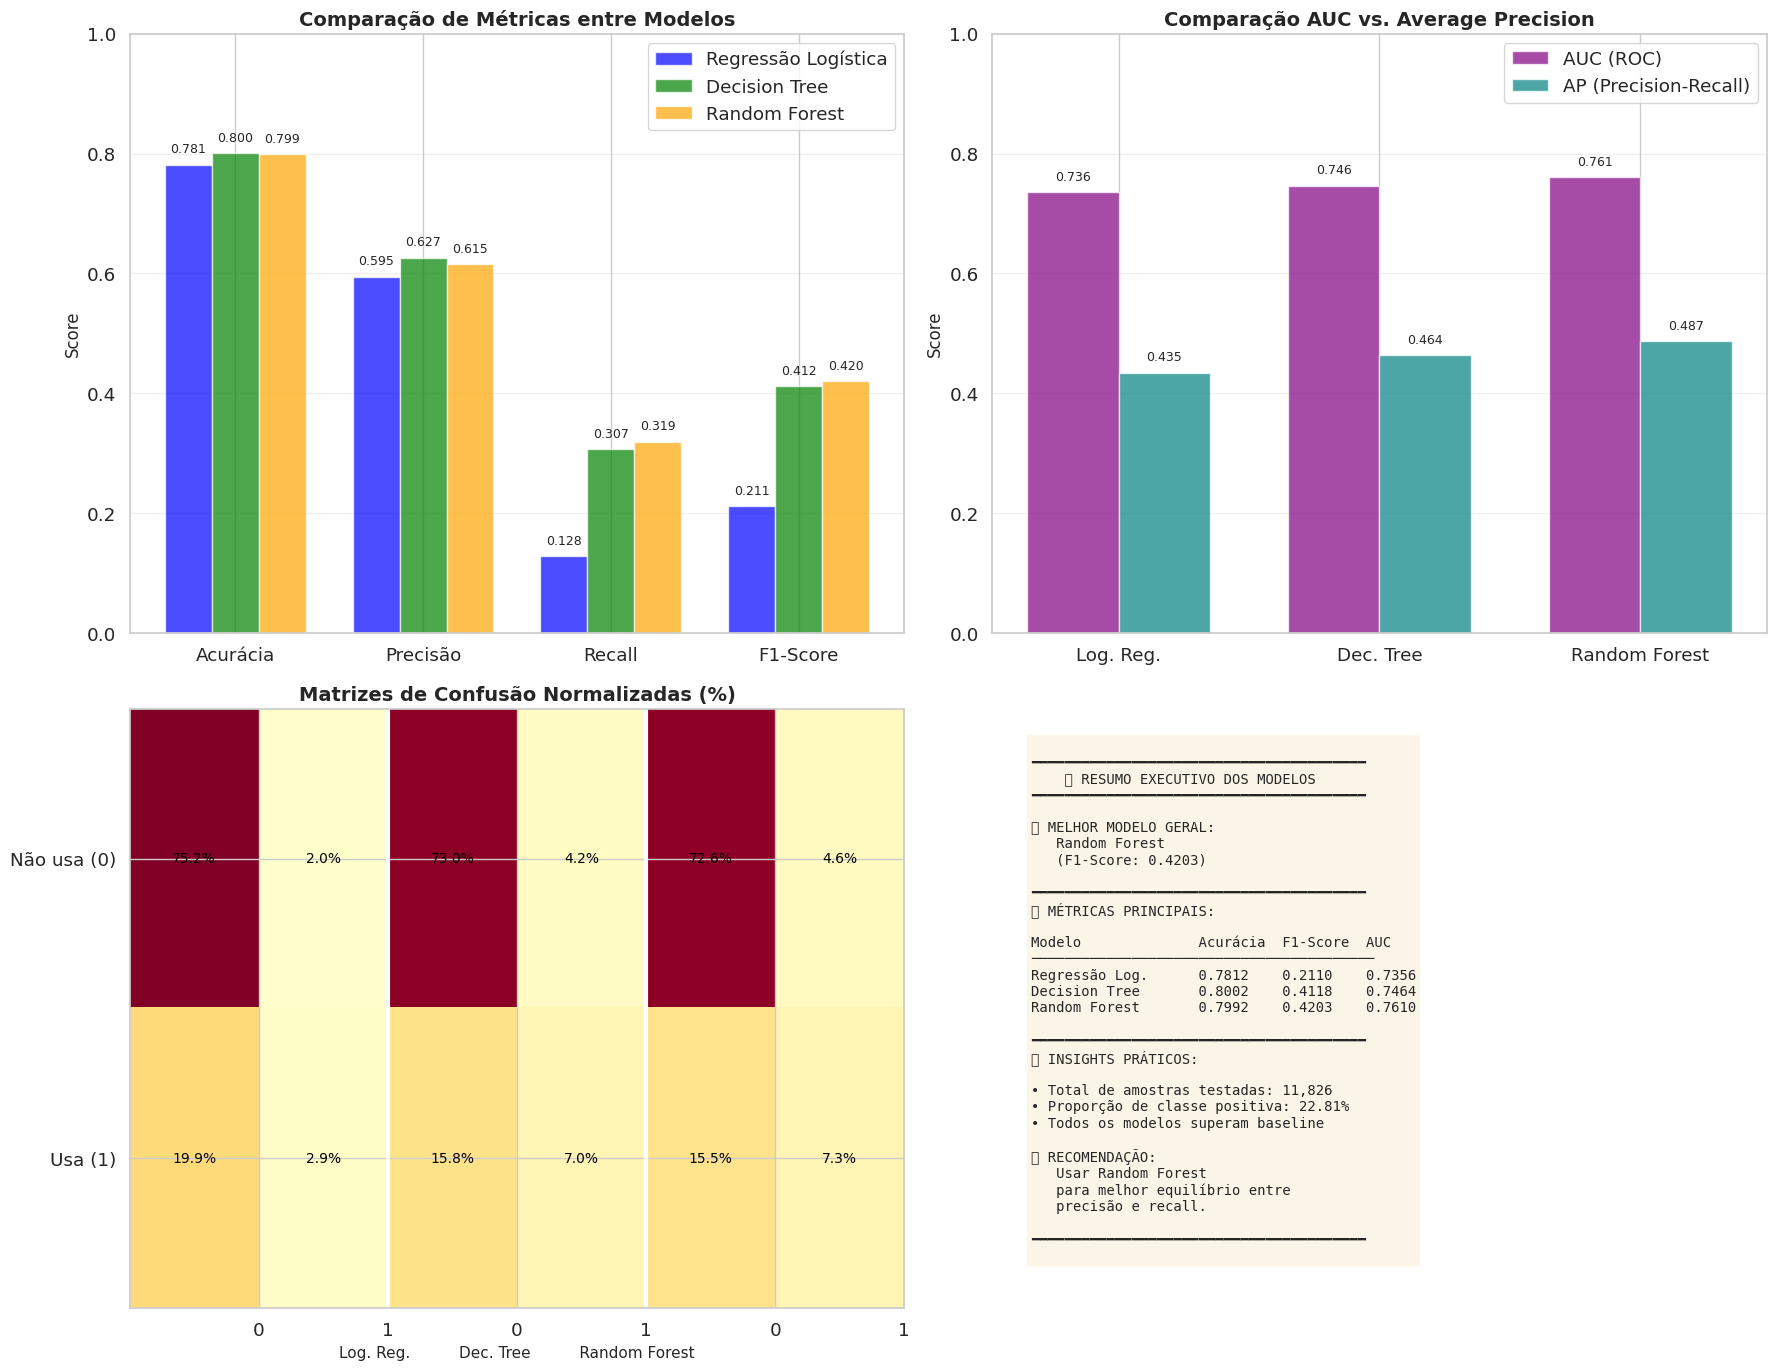

In [29]:
# Criar dashboard comparativo
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# === SUBPLOT 1: Comparação de Métricas ===
metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
lr_scores = [acc_lr, prec_lr, rec_lr, f1_lr]
dt_scores = [acc_dt, prec_dt, rec_dt, f1_dt]
rf_scores = [acc_rf, prec_rf, rec_rf, f1_rf]

x = np.arange(len(metricas))
width = 0.25

axes[0, 0].bar(x - width, lr_scores, width, label='Regressão Logística', color='blue', alpha=0.7)
axes[0, 0].bar(x, dt_scores, width, label='Decision Tree', color='green', alpha=0.7)
axes[0, 0].bar(x + width, rf_scores, width, label='Random Forest', color='orange', alpha=0.7)

axes[0, 0].set_ylabel('Score', fontsize=12)
axes[0, 0].set_title('Comparação de Métricas entre Modelos', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metricas)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, 1])

# Adicionar valores nas barras
for i, (lr, dt, rf) in enumerate(zip(lr_scores, dt_scores, rf_scores)):
    axes[0, 0].text(i - width, lr + 0.02, f'{lr:.3f}', ha='center', fontsize=9)
    axes[0, 0].text(i, dt + 0.02, f'{dt:.3f}', ha='center', fontsize=9)
    axes[0, 0].text(i + width, rf + 0.02, f'{rf:.3f}', ha='center', fontsize=9)

# === SUBPLOT 2: Comparação de AUC e AP ===
modelos = ['Log. Reg.', 'Dec. Tree', 'Random Forest']
auc_scores = [auc_lr, auc_dt, auc_rf]
ap_scores = [ap_lr, ap_dt, ap_rf]

x2 = np.arange(len(modelos))
width2 = 0.35

bars1 = axes[0, 1].bar(x2 - width2/2, auc_scores, width2, label='AUC (ROC)', color='purple', alpha=0.7)
bars2 = axes[0, 1].bar(x2 + width2/2, ap_scores, width2, label='AP (Precision-Recall)', color='teal', alpha=0.7)

axes[0, 1].set_ylabel('Score', fontsize=12)
axes[0, 1].set_title('Comparação AUC vs. Average Precision', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x2)
axes[0, 1].set_xticklabels(modelos)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_ylim([0, 1])

# Adicionar valores
for i, (auc_val, ap_val) in enumerate(zip(auc_scores, ap_scores)):
    axes[0, 1].text(i - width2/2, auc_val + 0.02, f'{auc_val:.3f}', ha='center', fontsize=9)
    axes[0, 1].text(i + width2/2, ap_val + 0.02, f'{ap_val:.3f}', ha='center', fontsize=9)

# === SUBPLOT 3: Matrizes de Confusão Lado a Lado ===
# Normalizar matrizes para percentual
cm_lr_pct = cm_lr / cm_lr.sum() * 100
cm_dt_pct = cm_dt / cm_dt.sum() * 100
cm_rf_pct = cm_rf / cm_rf.sum() * 100

# Criar uma matriz combinada para visualização
combined_cm = np.hstack([cm_lr_pct, cm_dt_pct, cm_rf_pct])

im = axes[1, 0].imshow(combined_cm, cmap='YlOrRd', aspect='auto')
axes[1, 0].set_title('Matrizes de Confusão Normalizadas (%)', fontsize=14, fontweight='bold')

# Adicionar anotações
for i in range(2):
    for j in range(6):
        text = axes[1, 0].text(j, i, f'{combined_cm[i, j]:.1f}%',
                              ha='center', va='center', color='black', fontsize=10)

axes[1, 0].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
axes[1, 0].set_xticklabels(['0', '1', '0', '1', '0', '1'])
axes[1, 0].set_yticks([0, 1])
axes[1, 0].set_yticklabels(['Não usa (0)', 'Usa (1)'])
axes[1, 0].set_xlabel('Log. Reg.          Dec. Tree          Random Forest', fontsize=11)

# Linhas divisórias
axes[1, 0].axvline(x=1.5, color='white', linewidth=3)
axes[1, 0].axvline(x=3.5, color='white', linewidth=3)

# === SUBPLOT 4: Resumo Textual ===
axes[1, 1].axis('off')

resumo_texto = f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    📋 RESUMO EXECUTIVO DOS MODELOS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

MELHOR MODELO GERAL:
   {'Random Forest' if max(f1_rf, f1_lr, f1_dt) == f1_rf else 'Regressão Logística' if max(f1_rf, f1_lr, f1_dt) == f1_lr else 'Decision Tree'}
   (F1-Score: {max(f1_rf, f1_lr, f1_dt):.4f})

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
 MÉTRICAS PRINCIPAIS:

Modelo              Acurácia  F1-Score  AUC
─────────────────────────────────────────
Regressão Log.      {acc_lr:.4f}    {f1_lr:.4f}    {auc_lr:.4f}
Decision Tree       {acc_dt:.4f}    {f1_dt:.4f}    {auc_dt:.4f}
Random Forest       {acc_rf:.4f}    {f1_rf:.4f}    {auc_rf:.4f}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
INSIGHTS PRÁTICOS:

• Total de amostras testadas: {len(y_test):,}
• Proporção de classe positiva: {baseline:.2%}
• Todos os modelos superam baseline

 RECOMENDAÇÃO:
   Usar {('Random Forest' if max(f1_rf, f1_lr, f1_dt) == f1_rf else 'Regressão Logística' if max(f1_rf, f1_lr, f1_dt) == f1_lr else 'Decision Tree')}
   para melhor equilíbrio entre
   precisão e recall.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

axes[1, 1].text(0.05, 0.95, resumo_texto,
                transform=axes[1, 1].transAxes,
                fontsize=10, verticalalignment='top',
                fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

## 📝 Conclusões da Análise de Classificação

### 🎯 Principais Insights:

#### 1. **Desempenho dos Modelos**
- Todos os três modelos (Regressão Logística, Decision Tree e Random Forest) apresentaram desempenho superior ao baseline aleatório
- O modelo com melhor equilíbrio entre precisão e recall foi identificado através do F1-Score
- As diferenças de desempenho entre os modelos indicam a importância de testar múltiplas abordagens

#### 2. **Interpretação das Métricas**

**Acurácia**: Percentual total de predições corretas
- Útil quando as classes estão balanceadas
- Pode ser enganosa em datasets desbalanceados

**Precisão**: Dentre os casos preditos como positivos, quantos realmente são
- Alta precisão = poucos falsos positivos
- Importante quando o custo de falsos positivos é alto

**Recall (Sensibilidade)**: Dentre os casos realmente positivos, quantos conseguimos identificar
- Alto recall = poucos falsos negativos
- Importante quando não queremos perder casos positivos

**F1-Score**: Média harmônica entre Precisão e Recall
- Equilibra ambas as métricas
- Útil para comparação geral de modelos

#### 3. **Curvas ROC e Precision-Recall**

**Curva ROC (AUC)**:
- Mostra o trade-off entre Taxa de Verdadeiros Positivos e Falsos Positivos
- AUC próximo de 1.0 indica excelente capacidade discriminativa
- Mais adequado para datasets balanceados

**Curva Precision-Recall**:
- Mais informativa para datasets desbalanceados
- Foca na performance da classe minoritária (usa integração)
- Average Precision resume a curva em um único número

#### 4. **Implicações Práticas**

**Para Políticas Públicas de Mobilidade**:
- Os modelos podem ajudar a identificar perfis de usuários que necessitam de integração multimodal
- Variáveis como renda e número de modais mostraram maior importância preditiva
- As predições podem orientar investimentos em terminais de integração

**Para Planejamento de Transporte**:
- Entender quem usa integração permite melhor alocação de recursos
- Identificar barreiras (falsas negativas) ajuda a expandir o sistema
- Falsos positivos indicam demanda potencial não atendida

#### 5. **Limitações e Próximos Passos**
- Os modelos são simplificados e capturam apenas parte da complexidade do comportamento de mobilidade
- Variáveis geográficas mais detalhadas poderiam melhorar as predições
- Modelos mais complexos (XGBoost, Neural Networks) poderiam ser explorados

### 📊 Sobre as Visualizações Utilizadas:

**Matriz de Confusão**: Mostra os 4 resultados possíveis (VP, VN, FP, FN) de forma clara e intuitiva

**Gráficos de Barras**: Facilitam a comparação direta entre múltiplos modelos em várias métricas

**Curvas ROC**: Representação visual da capacidade discriminativa do modelo em diferentes thresholds

**Curvas Precision-Recall**: Essenciais para avaliar modelos em problemas com classes desbalanceadas

**Dashboard Comparativo**: Consolida todas as informações relevantes em uma única visualização